<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/logistics/logistics_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 물류 유통량 예측 경진대회
대회 사이트: https://dacon.io/competitions/official/235867/overview/description

택배 운송량을 예측하여 비대면 경제의 발전을 예측하기 위한 경진대회

# 목차
0. 데이터 로드
1. 데이터 EDA, visualization
2. 데이터 전처리
3. 모델 생성 및 학습
4. 제출, 결론
* 참고
https://dacon.io/competitions/official/235867/codeshare/4733?page=1&dtype=recent

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 0.데이터로드

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
!cp /gdrive/MyDrive/Dacon_study/logistics/test.csv ./
!cp /gdrive/MyDrive/Dacon_study/logistics/sample_submission.csv ./
!cp /gdrive/MyDrive/Dacon_study/logistics/train.csv ./

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


* index
* 송하인_격자공간고유번호: 보내는 곳의 지역공간번호 ex) 서울시 강서구
* 수하인_격자공간고유번호: 받는 곳의 지역공간번호
* 물품_카테고리: 물품 종류
* 운송장_건수

In [7]:
train.head()

index      송하인_격자공간고유번호      수하인_격자공간고유번호 물품_카테고리  운송장_건수
0      0  5011000595017300  2871000192069300      음반       3
1      1  4148000690043300  5011000264024400   문화컨텐츠       3
2      2  5011000078068400  1120000007005400     농산물       3
3      3  4127100048006400  5011000587019400    기타식품       7
4      4  5011000078068400  2823700010076300     농산물       3

In [8]:
print(train.shape)

(31684, 5)


In [9]:
test.head()

index      송하인_격자공간고유번호      수하인_격자공간고유번호      물품_카테고리
0      0  4167000577042200  5011000435014100          선케어
1      1  1156000009012200  5011000172034400       구강위생용품
2      2  4122000363057300  5011000361097300           캠핑
3      3  5011000436041400  2826000084036400       아웃도어가구
4      4  4150000241065200  5011000169044300  분유/이유식/아기간식

In [10]:
print(test.shape)

(7920, 4)


# 1.데이터 EDA, visualization

## data cleansing

In [11]:
train.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [12]:
test.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
dtype: int64

null값 없다. 

In [13]:
train['물품_카테고리'].value_counts().head(30)

농산물          20321
문화컨텐츠         1091
음료            1034
수산             860
가공식품           846
기타식품           698
건강식품           591
음반             576
축산             383
냉동/간편조리식품      375
과자             320
생활용품           318
반려동물           315
주방용품           300
상의             294
기타패션의류         236
기타디지털/가전       220
스킨케어           205
문구/사무용품        167
건강용품           162
아우터            155
하의             150
기저귀/물티슈        130
기타화장품/미용       102
공구              95
다이어트식품          92
의료용품            82
인테리어소품          72
신발              70
취미용품            66
Name: 물품_카테고리, dtype: int64

In [14]:
train['물품_카테고리'].value_counts().shape

(100,)

물품 카테고리는 총 100개로 많은 편

In [15]:
train['송하인_격자공간고유번호'].value_counts().shape

(4229,)

데이터 31684 중에서 4229개의 송하인_격자공간고유번호

In [16]:
train['수하인_격자공간고유번호'].value_counts().shape

(26875,)

데이터 31684 중에서 26875개의 수하인_격자공간고유번호

## data visualization

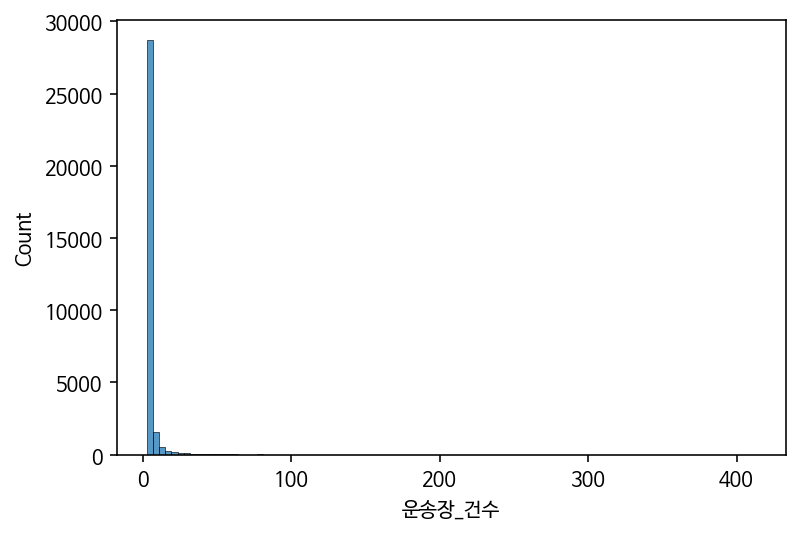

In [17]:
plt.figure()
sns.histplot(train['운송장_건수'], bins=100)
plt.show()

운송장 건수는 3-10 사이에 몰려있다. 

In [18]:
train['운송장_건수'].value_counts()

3      17565
4       6065
5       2928
6       1368
7        761
       ...  
77         1
108        1
211        1
130        1
89         1
Name: 운송장_건수, Length: 100, dtype: int64

# 2.데이터 전처리

In [19]:
# 송하인_격자공간고유번호 추출
train['send_grid'] = train['송하인_격자공간고유번호'].astype(str).str[:3].astype(int)
test['send_grid'] = test['송하인_격자공간고유번호'].astype(str).str[:3].astype(int)

# 수하인_격자공간고유번호 추출
train['rec_grid'] = train['수하인_격자공간고유번호'].astype(str).str[:3].astype(int)
test['rec_grid'] = test['수하인_격자공간고유번호'].astype(str).str[:3].astype(int)

In [ ]:
# train['sr_grid'] = train['send_grid'].astype(str).str.cat(train['rec_grid'].astype(str), sep=' - ')
# test['sr_grid'] = test['send_grid'].astype(str).str.cat(test['rec_grid'].astype(str), sep=' - ')

In [20]:
train.head()

index      송하인_격자공간고유번호      수하인_격자공간고유번호 물품_카테고리  운송장_건수  send_grid  \
0      0  5011000595017300  2871000192069300      음반       3        501   
1      1  4148000690043300  5011000264024400   문화컨텐츠       3        414   
2      2  5011000078068400  1120000007005400     농산물       3        501   
3      3  4127100048006400  5011000587019400    기타식품       7        412   
4      4  5011000078068400  2823700010076300     농산물       3        501   

   rec_grid  
0       287  
1       501  
2       112  
3       501  
4       282

In [ ]:
# train['trans_list'] = train['sr_grid'].str.cat(train['물품_카테고리'],sep=',')
# test['trans_list'] = test['sr_grid'].str.cat(test['물품_카테고리'],sep=',')

In [21]:
train.head()

index      송하인_격자공간고유번호      수하인_격자공간고유번호 물품_카테고리  운송장_건수  send_grid  \
0      0  5011000595017300  2871000192069300      음반       3        501   
1      1  4148000690043300  5011000264024400   문화컨텐츠       3        414   
2      2  5011000078068400  1120000007005400     농산물       3        501   
3      3  4127100048006400  5011000587019400    기타식품       7        412   
4      4  5011000078068400  2823700010076300     농산물       3        501   

   rec_grid  
0       287  
1       501  
2       112  
3       501  
4       282

In [22]:
train_df = train.drop(['index','송하인_격자공간고유번호','수하인_격자공간고유번호'],axis=1)

In [23]:
test.head()

index      송하인_격자공간고유번호      수하인_격자공간고유번호      물품_카테고리  send_grid  rec_grid
0      0  4167000577042200  5011000435014100          선케어        416       501
1      1  1156000009012200  5011000172034400       구강위생용품        115       501
2      2  4122000363057300  5011000361097300           캠핑        412       501
3      3  5011000436041400  2826000084036400       아웃도어가구        501       282
4      4  4150000241065200  5011000169044300  분유/이유식/아기간식        415       501

In [24]:
test_df = test.drop(['index','송하인_격자공간고유번호','수하인_격자공간고유번호'],axis=1)
test_df.head()

물품_카테고리  send_grid  rec_grid
0          선케어        416       501
1       구강위생용품        115       501
2           캠핑        412       501
3       아웃도어가구        501       282
4  분유/이유식/아기간식        415       501

# 3.모델생성 및 학습

## train, val 데이터 split

In [25]:
X= train.drop(['index','송하인_격자공간고유번호','수하인_격자공간고유번호','운송장_건수'],axis=1)
# y= train['운송장_건수']
y= np.log1p(train['운송장_건수'])

In [26]:
X.head()

물품_카테고리  send_grid  rec_grid
0      음반        501       287
1   문화컨텐츠        414       501
2     농산물        501       112
3    기타식품        412       501
4     농산물        501       282

In [27]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=42)

## Catboost

### 학습

In [28]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.7 MB/s eta 0:00:00


In [29]:
# 모델링 라이브러리
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [30]:
cat_reg = CatBoostRegressor(n_estimators=200, random_state=42)

cat_reg.fit(train_x,train_y, cat_features=['물품_카테고리'])
pred = cat_reg.predict(val_x)
mse = mean_squared_error(val_y,pred)
rmse = mse**(1/2)

print("RMSE: ",rmse)

Learning rate set to 0.252501
0:	learn: 0.4125892	total: 95.7ms	remaining: 19s
1:	learn: 0.4101041	total: 140ms	remaining: 13.9s
2:	learn: 0.4087888	total: 164ms	remaining: 10.8s
3:	learn: 0.4078431	total: 186ms	remaining: 9.11s
4:	learn: 0.4073546	total: 203ms	remaining: 7.93s
5:	learn: 0.4068605	total: 237ms	remaining: 7.67s
6:	learn: 0.4063573	total: 264ms	remaining: 7.28s
7:	learn: 0.4060774	total: 292ms	remaining: 7.02s
8:	learn: 0.4059285	total: 314ms	remaining: 6.66s
9:	learn: 0.4058948	total: 332ms	remaining: 6.31s
10:	learn: 0.4055493	total: 364ms	remaining: 6.25s
11:	learn: 0.4053314	total: 373ms	remaining: 5.85s
12:	learn: 0.4052044	total: 421ms	remaining: 6.05s
13:	learn: 0.4051469	total: 447ms	remaining: 5.93s
14:	learn: 0.4050814	total: 475ms	remaining: 5.86s
15:	learn: 0.4050066	total: 515ms	remaining: 5.93s
16:	learn: 0.4049659	total: 553ms	remaining: 5.95s
17:	learn: 0.4047935	total: 584ms	remaining: 5.9s
18:	learn: 0.4047934	total: 589ms	remaining: 5.61s
19:	learn: 0.

### 하이퍼파라미터 튜닝- optuna

In [31]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 14.9 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=265bc569e1aac120837362631e9af7e51b6e5c12dafc335e1cad3edbf845ccbd
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  At

In [32]:
# Optuna Libraries
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [33]:
# random sampler
sampler = TPESampler(seed=10)

def objective(trial):

  cat_param = {
      'max_depth':trial.suggest_int('max_depth', 2, 12),
      'min_child_samples':trial.suggest_int('min_child_samples', 5, 100),
      'n_estimators':trial.suggest_int('n_estimators', 100, 500),
      'learning_rate':trial.suggest_loguniform('learning_rate',0.01,0.3)
  }
  
  model_cat = CatBoostRegressor(**cat_param)
    
  model_cat = model_cat.fit(train_x, train_y, eval_set=(val_x,val_y), cat_features=['물품_카테고리'])    
  
  # 평가지표
  MSE = mean_squared_error(val_y, model_cat.predict(val_x))

  return MSE
  
optuna_cat = optuna.create_study(direction='minimize',sampler = sampler)

optuna_cat.optimize(objective, n_trials=100)

[I 2023-01-06 01:39:00,201] A new study created in memory with name: no-name-3247cc4f-0ab2-4f5c-8cb0-69fa75ec412a


0:	learn: 0.4138200	test: 0.4123166	best: 0.4123166 (0)	total: 19.9ms	remaining: 7.04s
1:	learn: 0.4123697	test: 0.4106889	best: 0.4106889 (1)	total: 39.3ms	remaining: 6.91s
2:	learn: 0.4110040	test: 0.4091333	best: 0.4091333 (2)	total: 54.4ms	remaining: 6.37s
3:	learn: 0.4102789	test: 0.4082349	best: 0.4082349 (3)	total: 60ms	remaining: 5.25s
4:	learn: 0.4092403	test: 0.4072923	best: 0.4072923 (4)	total: 82ms	remaining: 5.72s
5:	learn: 0.4087047	test: 0.4067175	best: 0.4067175 (5)	total: 87.8ms	remaining: 5.09s
6:	learn: 0.4080914	test: 0.4061466	best: 0.4061466 (6)	total: 104ms	remaining: 5.17s
7:	learn: 0.4075697	test: 0.4056633	best: 0.4056633 (7)	total: 122ms	remaining: 5.26s
8:	learn: 0.4071995	test: 0.4053237	best: 0.4053237 (8)	total: 137ms	remaining: 5.25s
9:	learn: 0.4067034	test: 0.4048336	best: 0.4048336 (9)	total: 156ms	remaining: 5.35s
10:	learn: 0.4064287	test: 0.4046483	best: 0.4046483 (10)	total: 170ms	remaining: 5.3s
11:	learn: 0.4061066	test: 0.4044241	best: 0.404424

[I 2023-01-06 01:39:06,376] Trial 0 finished with value: 0.16134704939773512 and parameters: {'max_depth': 10, 'min_child_samples': 6, 'n_estimators': 354, 'learning_rate': 0.12766567050674044}. Best is trial 0 with value: 0.16134704939773512.


0:	learn: 0.4141395	test: 0.4125324	best: 0.4125324 (0)	total: 8.26ms	remaining: 1.47s
1:	learn: 0.4123178	test: 0.4105687	best: 0.4105687 (1)	total: 15.3ms	remaining: 1.35s
2:	learn: 0.4113314	test: 0.4093930	best: 0.4093930 (2)	total: 19.8ms	remaining: 1.16s
3:	learn: 0.4101058	test: 0.4080543	best: 0.4080543 (3)	total: 26.5ms	remaining: 1.16s
4:	learn: 0.4094967	test: 0.4073553	best: 0.4073553 (4)	total: 32.8ms	remaining: 1.14s
5:	learn: 0.4088034	test: 0.4067168	best: 0.4067168 (5)	total: 39.3ms	remaining: 1.13s
6:	learn: 0.4083797	test: 0.4062696	best: 0.4062696 (6)	total: 45.8ms	remaining: 1.13s
7:	learn: 0.4078478	test: 0.4058046	best: 0.4058046 (7)	total: 52.7ms	remaining: 1.13s
8:	learn: 0.4075825	test: 0.4054678	best: 0.4054678 (8)	total: 58ms	remaining: 1.09s
9:	learn: 0.4072706	test: 0.4051743	best: 0.4051743 (9)	total: 64.9ms	remaining: 1.1s
10:	learn: 0.4070330	test: 0.4049805	best: 0.4049805 (10)	total: 72.1ms	remaining: 1.1s
11:	learn: 0.4069354	test: 0.4049127	best: 0.

[I 2023-01-06 01:39:07,704] Trial 1 finished with value: 0.16232715151939905 and parameters: {'max_depth': 7, 'min_child_samples': 26, 'n_estimators': 179, 'learning_rate': 0.13286056037300167}. Best is trial 0 with value: 0.16134704939773512.


178:	learn: 0.4001045	test: 0.4029409	best: 0.4028984 (176)	total: 1.22s	remaining: 0us

bestTest = 0.4028984401
bestIteration = 176

Shrink model to first 177 iterations.
0:	learn: 0.4130821	test: 0.4112530	best: 0.4112530 (0)	total: 5.31ms	remaining: 1.98s
1:	learn: 0.4110449	test: 0.4086936	best: 0.4086936 (1)	total: 9.36ms	remaining: 1.74s
2:	learn: 0.4098291	test: 0.4072259	best: 0.4072259 (2)	total: 13ms	remaining: 1.61s
3:	learn: 0.4090037	test: 0.4062882	best: 0.4062882 (3)	total: 19ms	remaining: 1.76s
4:	learn: 0.4084289	test: 0.4055286	best: 0.4055286 (4)	total: 23.5ms	remaining: 1.74s
5:	learn: 0.4081618	test: 0.4052084	best: 0.4052084 (5)	total: 28.3ms	remaining: 1.73s
6:	learn: 0.4079447	test: 0.4049648	best: 0.4049648 (6)	total: 32ms	remaining: 1.68s
7:	learn: 0.4078245	test: 0.4047731	best: 0.4047731 (7)	total: 36ms	remaining: 1.65s
8:	learn: 0.4075929	test: 0.4043658	best: 0.4043658 (8)	total: 41.4ms	remaining: 1.68s
9:	learn: 0.4074512	test: 0.4042987	best: 0.4042987 (

[I 2023-01-06 01:39:09,654] Trial 2 finished with value: 0.16122474358888036 and parameters: {'max_depth': 3, 'min_child_samples': 13, 'n_estimators': 374, 'learning_rate': 0.2560221708894264}. Best is trial 2 with value: 0.16122474358888036.


364:	learn: 0.4006077	test: 0.4016383	best: 0.4016093 (353)	total: 1.77s	remaining: 43.6ms
365:	learn: 0.4006046	test: 0.4016392	best: 0.4016093 (353)	total: 1.77s	remaining: 38.8ms
366:	learn: 0.4006043	test: 0.4016399	best: 0.4016093 (353)	total: 1.78s	remaining: 33.9ms
367:	learn: 0.4005980	test: 0.4016343	best: 0.4016093 (353)	total: 1.78s	remaining: 29.1ms
368:	learn: 0.4005940	test: 0.4016305	best: 0.4016093 (353)	total: 1.79s	remaining: 24.2ms
369:	learn: 0.4004868	test: 0.4015280	best: 0.4015280 (369)	total: 1.79s	remaining: 19.4ms
370:	learn: 0.4004648	test: 0.4015490	best: 0.4015280 (369)	total: 1.8s	remaining: 14.5ms
371:	learn: 0.4004641	test: 0.4015485	best: 0.4015280 (369)	total: 1.8s	remaining: 9.69ms
372:	learn: 0.4004495	test: 0.4015544	best: 0.4015280 (369)	total: 1.8s	remaining: 4.84ms
373:	learn: 0.4004278	test: 0.4015470	best: 0.4015280 (369)	total: 1.81s	remaining: 0us

bestTest = 0.401528013
bestIteration = 369

Shrink model to first 370 iterations.
0:	learn: 0.4

[I 2023-01-06 01:39:11,477] Trial 3 finished with value: 0.16290141240147107 and parameters: {'max_depth': 2, 'min_child_samples': 54, 'n_estimators': 425, 'learning_rate': 0.0803110441567395}. Best is trial 2 with value: 0.16122474358888036.


423:	learn: 0.4048041	test: 0.4036107	best: 0.4036107 (423)	total: 1.66s	remaining: 3.92ms
424:	learn: 0.4048012	test: 0.4036105	best: 0.4036105 (424)	total: 1.67s	remaining: 0us

bestTest = 0.403610473
bestIteration = 424

0:	learn: 0.4142142	test: 0.4127061	best: 0.4127061 (0)	total: 13.1ms	remaining: 6.1s
1:	learn: 0.4130684	test: 0.4113765	best: 0.4113765 (1)	total: 17.4ms	remaining: 4.05s
2:	learn: 0.4117814	test: 0.4099093	best: 0.4099093 (2)	total: 30ms	remaining: 4.64s
3:	learn: 0.4106338	test: 0.4087350	best: 0.4087350 (3)	total: 43.4ms	remaining: 5.04s
4:	learn: 0.4098075	test: 0.4078189	best: 0.4078189 (4)	total: 55.4ms	remaining: 5.13s
5:	learn: 0.4091840	test: 0.4071271	best: 0.4071271 (5)	total: 66.4ms	remaining: 5.11s
6:	learn: 0.4085405	test: 0.4065029	best: 0.4065029 (6)	total: 80.5ms	remaining: 5.3s
7:	learn: 0.4080385	test: 0.4060314	best: 0.4060314 (7)	total: 94.2ms	remaining: 5.42s
8:	learn: 0.4076602	test: 0.4056706	best: 0.4056706 (8)	total: 108ms	remaining: 5.5s

[I 2023-01-06 01:39:23,088] Trial 4 finished with value: 0.1615001537919581 and parameters: {'max_depth': 9, 'min_child_samples': 33, 'n_estimators': 468, 'learning_rate': 0.11363577488646587}. Best is trial 2 with value: 0.16122474358888036.


462:	learn: 0.3866292	test: 0.4024373	best: 0.4018708 (134)	total: 11.2s	remaining: 121ms
463:	learn: 0.3865482	test: 0.4023945	best: 0.4018708 (134)	total: 11.2s	remaining: 96.6ms
464:	learn: 0.3865314	test: 0.4023964	best: 0.4018708 (134)	total: 11.2s	remaining: 72.4ms
465:	learn: 0.3865227	test: 0.4023977	best: 0.4018708 (134)	total: 11.2s	remaining: 48.2ms
466:	learn: 0.3864889	test: 0.4023914	best: 0.4018708 (134)	total: 11.2s	remaining: 24.1ms
467:	learn: 0.3864448	test: 0.4024257	best: 0.4018708 (134)	total: 11.3s	remaining: 0us

bestTest = 0.4018708193
bestIteration = 134

Shrink model to first 135 iterations.
0:	learn: 0.4146241	test: 0.4129871	best: 0.4129871 (0)	total: 8.72ms	remaining: 2.16s
1:	learn: 0.4134542	test: 0.4116272	best: 0.4116272 (1)	total: 14.8ms	remaining: 1.82s
2:	learn: 0.4122818	test: 0.4102956	best: 0.4102956 (2)	total: 24.5ms	remaining: 2.01s
3:	learn: 0.4113954	test: 0.4092527	best: 0.4092527 (3)	total: 32.9ms	remaining: 2.02s
4:	learn: 0.4105908	test: 

[I 2023-01-06 01:39:25,559] Trial 5 finished with value: 0.1614140131347023 and parameters: {'max_depth': 7, 'min_child_samples': 18, 'n_estimators': 249, 'learning_rate': 0.0990323514868435}. Best is trial 2 with value: 0.16122474358888036.


247:	learn: 0.3980376	test: 0.4018049	best: 0.4017906 (246)	total: 2.31s	remaining: 9.33ms
248:	learn: 0.3980221	test: 0.4017636	best: 0.4017636 (248)	total: 2.32s	remaining: 0us

bestTest = 0.4017636304
bestIteration = 248

0:	learn: 0.4152149	test: 0.4137189	best: 0.4137189 (0)	total: 7.93ms	remaining: 2.74s
1:	learn: 0.4143438	test: 0.4127360	best: 0.4127360 (1)	total: 15.5ms	remaining: 2.68s
2:	learn: 0.4135520	test: 0.4118028	best: 0.4118028 (2)	total: 23.2ms	remaining: 2.66s
3:	learn: 0.4128976	test: 0.4111511	best: 0.4111511 (3)	total: 31.9ms	remaining: 2.74s
4:	learn: 0.4122902	test: 0.4104403	best: 0.4104403 (4)	total: 39.7ms	remaining: 2.72s
5:	learn: 0.4117718	test: 0.4098526	best: 0.4098526 (5)	total: 46.5ms	remaining: 2.65s
6:	learn: 0.4113471	test: 0.4093852	best: 0.4093852 (6)	total: 55.3ms	remaining: 2.69s
7:	learn: 0.4108982	test: 0.4089276	best: 0.4089276 (7)	total: 63.5ms	remaining: 2.69s
8:	learn: 0.4104496	test: 0.4084308	best: 0.4084308 (8)	total: 71.7ms	remaining

[I 2023-01-06 01:39:28,374] Trial 6 finished with value: 0.161512078193167 and parameters: {'max_depth': 6, 'min_child_samples': 46, 'n_estimators': 347, 'learning_rate': 0.057275304226203264}. Best is trial 2 with value: 0.16122474358888036.


339:	learn: 0.4004414	test: 0.4019225	best: 0.4018857 (324)	total: 2.58s	remaining: 53.2ms
340:	learn: 0.4004160	test: 0.4019038	best: 0.4018857 (324)	total: 2.59s	remaining: 45.6ms
341:	learn: 0.4004129	test: 0.4019021	best: 0.4018857 (324)	total: 2.6s	remaining: 38ms
342:	learn: 0.4004054	test: 0.4019043	best: 0.4018857 (324)	total: 2.61s	remaining: 30.4ms
343:	learn: 0.4003831	test: 0.4018892	best: 0.4018857 (324)	total: 2.63s	remaining: 22.9ms
344:	learn: 0.4003743	test: 0.4018857	best: 0.4018857 (344)	total: 2.64s	remaining: 15.3ms
345:	learn: 0.4003637	test: 0.4018893	best: 0.4018857 (344)	total: 2.65s	remaining: 7.65ms
346:	learn: 0.4003432	test: 0.4018961	best: 0.4018857 (344)	total: 2.65s	remaining: 0us

bestTest = 0.4018856551
bestIteration = 344

Shrink model to first 345 iterations.
0:	learn: 0.4150610	test: 0.4136192	best: 0.4136192 (0)	total: 12.7ms	remaining: 5.36s
1:	learn: 0.4143786	test: 0.4128311	best: 0.4128311 (1)	total: 16.5ms	remaining: 3.47s
2:	learn: 0.4135331	

[I 2023-01-06 01:39:33,816] Trial 7 finished with value: 0.161208998844717 and parameters: {'max_depth': 9, 'min_child_samples': 62, 'n_estimators': 422, 'learning_rate': 0.05895709770563241}. Best is trial 7 with value: 0.161208998844717.


0:	learn: 0.4155901	test: 0.4141614	best: 0.4141614 (0)	total: 26.3ms	remaining: 3.56s
1:	learn: 0.4151205	test: 0.4136536	best: 0.4136536 (1)	total: 43.4ms	remaining: 2.91s
2:	learn: 0.4147241	test: 0.4131765	best: 0.4131765 (2)	total: 49.4ms	remaining: 2.19s
3:	learn: 0.4142664	test: 0.4127033	best: 0.4127033 (3)	total: 66ms	remaining: 2.18s
4:	learn: 0.4139016	test: 0.4122872	best: 0.4122872 (4)	total: 80.5ms	remaining: 2.11s
5:	learn: 0.4135376	test: 0.4119059	best: 0.4119059 (5)	total: 91ms	remaining: 1.97s
6:	learn: 0.4131236	test: 0.4114958	best: 0.4114958 (6)	total: 107ms	remaining: 1.98s
7:	learn: 0.4128469	test: 0.4111787	best: 0.4111787 (7)	total: 112ms	remaining: 1.8s
8:	learn: 0.4125222	test: 0.4108355	best: 0.4108355 (8)	total: 126ms	remaining: 1.78s
9:	learn: 0.4122504	test: 0.4105142	best: 0.4105142 (9)	total: 131ms	remaining: 1.65s
10:	learn: 0.4119125	test: 0.4101782	best: 0.4101782 (10)	total: 163ms	remaining: 1.85s
11:	learn: 0.4116022	test: 0.4098443	best: 0.409844

[I 2023-01-06 01:39:35,869] Trial 8 finished with value: 0.1627235958703626 and parameters: {'max_depth': 11, 'min_child_samples': 35, 'n_estimators': 136, 'learning_rate': 0.027808044192725104}. Best is trial 7 with value: 0.161208998844717.


131:	learn: 0.4038962	test: 0.4034048	best: 0.4034048 (131)	total: 1.88s	remaining: 57ms
132:	learn: 0.4038752	test: 0.4033901	best: 0.4033901 (132)	total: 1.9s	remaining: 42.9ms
133:	learn: 0.4038744	test: 0.4033909	best: 0.4033901 (132)	total: 1.91s	remaining: 28.4ms
134:	learn: 0.4038558	test: 0.4033947	best: 0.4033901 (132)	total: 1.92s	remaining: 14.2ms
135:	learn: 0.4038443	test: 0.4033959	best: 0.4033901 (132)	total: 1.93s	remaining: 0us

bestTest = 0.4033901305
bestIteration = 132

Shrink model to first 133 iterations.
0:	learn: 0.4149668	test: 0.4134448	best: 0.4134448 (0)	total: 9.53ms	remaining: 1.11s
1:	learn: 0.4139826	test: 0.4122601	best: 0.4122601 (1)	total: 18.3ms	remaining: 1.06s
2:	learn: 0.4131020	test: 0.4111965	best: 0.4111965 (2)	total: 22.4ms	remaining: 860ms
3:	learn: 0.4123478	test: 0.4103436	best: 0.4103436 (3)	total: 27.1ms	remaining: 771ms
4:	learn: 0.4117342	test: 0.4096493	best: 0.4096493 (4)	total: 31.2ms	remaining: 705ms
5:	learn: 0.4111870	test: 0.4090

[I 2023-01-06 01:39:36,474] Trial 9 finished with value: 0.1629971151004741 and parameters: {'max_depth': 3, 'min_child_samples': 84, 'n_estimators': 118, 'learning_rate': 0.08415928910432512}. Best is trial 7 with value: 0.161208998844717.


110:	learn: 0.4056119	test: 0.4037427	best: 0.4037394 (109)	total: 486ms	remaining: 30.6ms
111:	learn: 0.4056095	test: 0.4037428	best: 0.4037394 (109)	total: 490ms	remaining: 26.3ms
112:	learn: 0.4056019	test: 0.4037457	best: 0.4037394 (109)	total: 494ms	remaining: 21.9ms
113:	learn: 0.4055936	test: 0.4037454	best: 0.4037394 (109)	total: 498ms	remaining: 17.5ms
114:	learn: 0.4055869	test: 0.4037335	best: 0.4037335 (114)	total: 502ms	remaining: 13.1ms
115:	learn: 0.4055812	test: 0.4037325	best: 0.4037325 (115)	total: 508ms	remaining: 8.76ms
116:	learn: 0.4055654	test: 0.4037308	best: 0.4037308 (116)	total: 512ms	remaining: 4.38ms
117:	learn: 0.4055646	test: 0.4037290	best: 0.4037290 (117)	total: 516ms	remaining: 0us

bestTest = 0.4037290138
bestIteration = 117

0:	learn: 0.4158216	test: 0.4144385	best: 0.4144385 (0)	total: 34.2ms	remaining: 16.9s
1:	learn: 0.4156136	test: 0.4142262	best: 0.4142262 (1)	total: 69.8ms	remaining: 17.2s
2:	learn: 0.4154146	test: 0.4140195	best: 0.4140195 (2)

[I 2023-01-06 01:39:50,651] Trial 10 finished with value: 0.16202685844145912 and parameters: {'max_depth': 12, 'min_child_samples': 77, 'n_estimators': 494, 'learning_rate': 0.011200250597965844}. Best is trial 7 with value: 0.161208998844717.


0:	learn: 0.4156071	test: 0.4141752	best: 0.4141752 (0)	total: 5.76ms	remaining: 2.22s
1:	learn: 0.4151800	test: 0.4136650	best: 0.4136650 (1)	total: 11.3ms	remaining: 2.17s
2:	learn: 0.4148129	test: 0.4132639	best: 0.4132639 (2)	total: 17.6ms	remaining: 2.25s
3:	learn: 0.4144737	test: 0.4128630	best: 0.4128630 (3)	total: 24ms	remaining: 2.29s
4:	learn: 0.4141238	test: 0.4124631	best: 0.4124631 (4)	total: 29.8ms	remaining: 2.27s
5:	learn: 0.4137951	test: 0.4120924	best: 0.4120924 (5)	total: 35.3ms	remaining: 2.23s
6:	learn: 0.4134683	test: 0.4116991	best: 0.4116991 (6)	total: 40.5ms	remaining: 2.19s
7:	learn: 0.4131378	test: 0.4113053	best: 0.4113053 (7)	total: 54.4ms	remaining: 2.57s
8:	learn: 0.4128647	test: 0.4109704	best: 0.4109704 (8)	total: 66.7ms	remaining: 2.79s
9:	learn: 0.4125592	test: 0.4106091	best: 0.4106091 (9)	total: 71.7ms	remaining: 2.7s
10:	learn: 0.4122947	test: 0.4102909	best: 0.4102909 (10)	total: 76.1ms	remaining: 2.59s
11:	learn: 0.4120728	test: 0.4100250	best: 0

[I 2023-01-06 01:39:53,083] Trial 11 finished with value: 0.16241676411172004 and parameters: {'max_depth': 4, 'min_child_samples': 65, 'n_estimators': 386, 'learning_rate': 0.029493455338013404}. Best is trial 7 with value: 0.161208998844717.


384:	learn: 0.4042899	test: 0.4030265	best: 0.4030096 (377)	total: 2.25s	remaining: 5.84ms
385:	learn: 0.4042871	test: 0.4030254	best: 0.4030096 (377)	total: 2.26s	remaining: 0us

bestTest = 0.4030096346
bestIteration = 377

Shrink model to first 378 iterations.
0:	learn: 0.4126818	test: 0.4107474	best: 0.4107474 (0)	total: 7.27ms	remaining: 2.17s
1:	learn: 0.4104363	test: 0.4082491	best: 0.4082491 (1)	total: 13.9ms	remaining: 2.06s
2:	learn: 0.4090648	test: 0.4065007	best: 0.4065007 (2)	total: 19.2ms	remaining: 1.89s
3:	learn: 0.4084678	test: 0.4057489	best: 0.4057489 (3)	total: 23.9ms	remaining: 1.76s
4:	learn: 0.4079993	test: 0.4052214	best: 0.4052214 (4)	total: 30.2ms	remaining: 1.77s
5:	learn: 0.4076254	test: 0.4047298	best: 0.4047298 (5)	total: 35.9ms	remaining: 1.75s
6:	learn: 0.4072004	test: 0.4045986	best: 0.4045986 (6)	total: 41.8ms	remaining: 1.74s
7:	learn: 0.4067660	test: 0.4043057	best: 0.4043057 (7)	total: 49.3ms	remaining: 1.79s
8:	learn: 0.4067281	test: 0.4042196	best:

[I 2023-01-06 01:39:55,372] Trial 12 finished with value: 0.1612211607563093 and parameters: {'max_depth': 5, 'min_child_samples': 97, 'n_estimators': 299, 'learning_rate': 0.2633815900712579}. Best is trial 7 with value: 0.161208998844717.


0:	learn: 0.4120379	test: 0.4103335	best: 0.4103335 (0)	total: 13.4ms	remaining: 3.68s
1:	learn: 0.4102827	test: 0.4082617	best: 0.4082617 (1)	total: 17.6ms	remaining: 2.41s
2:	learn: 0.4084806	test: 0.4062712	best: 0.4062712 (2)	total: 31.2ms	remaining: 2.84s
3:	learn: 0.4069612	test: 0.4045826	best: 0.4045826 (3)	total: 44.9ms	remaining: 3.05s
4:	learn: 0.4062267	test: 0.4038741	best: 0.4038741 (4)	total: 57.6ms	remaining: 3.12s
5:	learn: 0.4056656	test: 0.4034833	best: 0.4034833 (5)	total: 72.5ms	remaining: 3.26s
6:	learn: 0.4055218	test: 0.4032934	best: 0.4032934 (6)	total: 78.5ms	remaining: 3.02s
7:	learn: 0.4050905	test: 0.4032178	best: 0.4032178 (7)	total: 92.7ms	remaining: 3.1s
8:	learn: 0.4047748	test: 0.4029089	best: 0.4029089 (8)	total: 99.3ms	remaining: 2.94s
9:	learn: 0.4045603	test: 0.4028129	best: 0.4028129 (9)	total: 113ms	remaining: 3.01s
10:	learn: 0.4043913	test: 0.4027622	best: 0.4027622 (10)	total: 127ms	remaining: 3.06s
11:	learn: 0.4042089	test: 0.4027976	best: 0

[I 2023-01-06 01:39:59,394] Trial 13 finished with value: 0.16135733564408045 and parameters: {'max_depth': 9, 'min_child_samples': 96, 'n_estimators': 276, 'learning_rate': 0.2719078898519433}. Best is trial 7 with value: 0.161208998844717.


270:	learn: 0.3822023	test: 0.4024778	best: 0.4016931 (68)	total: 3.77s	remaining: 69.5ms
271:	learn: 0.3821803	test: 0.4024721	best: 0.4016931 (68)	total: 3.79s	remaining: 55.7ms
272:	learn: 0.3821601	test: 0.4024683	best: 0.4016931 (68)	total: 3.8s	remaining: 41.8ms
273:	learn: 0.3821041	test: 0.4024779	best: 0.4016931 (68)	total: 3.81s	remaining: 27.8ms
274:	learn: 0.3820743	test: 0.4024791	best: 0.4016931 (68)	total: 3.83s	remaining: 13.9ms
275:	learn: 0.3820304	test: 0.4025223	best: 0.4016931 (68)	total: 3.84s	remaining: 0us

bestTest = 0.4016930883
bestIteration = 68

Shrink model to first 69 iterations.
0:	learn: 0.4155338	test: 0.4140877	best: 0.4140877 (0)	total: 6.95ms	remaining: 1.49s
1:	learn: 0.4150113	test: 0.4135084	best: 0.4135084 (1)	total: 18.3ms	remaining: 1.95s
2:	learn: 0.4145255	test: 0.4129244	best: 0.4129244 (2)	total: 25.5ms	remaining: 1.8s
3:	learn: 0.4140756	test: 0.4124245	best: 0.4124245 (3)	total: 34.2ms	remaining: 1.8s
4:	learn: 0.4136526	test: 0.4119926	

[I 2023-01-06 01:40:01,031] Trial 14 finished with value: 0.16252088381401864 and parameters: {'max_depth': 5, 'min_child_samples': 96, 'n_estimators': 215, 'learning_rate': 0.034502534653237535}. Best is trial 7 with value: 0.161208998844717.


213:	learn: 0.4044707	test: 0.4031457	best: 0.4031457 (213)	total: 1.48s	remaining: 6.94ms
214:	learn: 0.4044658	test: 0.4031388	best: 0.4031388 (214)	total: 1.49s	remaining: 0us

bestTest = 0.4031387916
bestIteration = 214

0:	learn: 0.4158375	test: 0.4144335	best: 0.4144335 (0)	total: 10.1ms	remaining: 3.18s
1:	learn: 0.4156317	test: 0.4141888	best: 0.4141888 (1)	total: 19.1ms	remaining: 3s
2:	learn: 0.4154401	test: 0.4139914	best: 0.4139914 (2)	total: 28.8ms	remaining: 3s
3:	learn: 0.4152507	test: 0.4137675	best: 0.4137675 (3)	total: 36.6ms	remaining: 2.85s
4:	learn: 0.4150619	test: 0.4135498	best: 0.4135498 (4)	total: 43.2ms	remaining: 2.69s
5:	learn: 0.4148891	test: 0.4133652	best: 0.4133652 (5)	total: 51.9ms	remaining: 2.68s
6:	learn: 0.4147253	test: 0.4131797	best: 0.4131797 (6)	total: 62ms	remaining: 2.74s
7:	learn: 0.4145353	test: 0.4129737	best: 0.4129737 (7)	total: 72.7ms	remaining: 2.8s
8:	learn: 0.4143525	test: 0.4127583	best: 0.4127583 (8)	total: 82.9ms	remaining: 2.83s
9

[I 2023-01-06 01:40:04,544] Trial 15 finished with value: 0.16237570934291637 and parameters: {'max_depth': 8, 'min_child_samples': 70, 'n_estimators': 316, 'learning_rate': 0.012737586134678057}. Best is trial 7 with value: 0.161208998844717.


305:	learn: 0.4040353	test: 0.4030216	best: 0.4030215 (303)	total: 3.22s	remaining: 105ms
306:	learn: 0.4040232	test: 0.4030060	best: 0.4030060 (306)	total: 3.23s	remaining: 94.7ms
307:	learn: 0.4040202	test: 0.4030033	best: 0.4030033 (307)	total: 3.24s	remaining: 84.2ms
308:	learn: 0.4040161	test: 0.4030015	best: 0.4030015 (308)	total: 3.25s	remaining: 73.7ms
309:	learn: 0.4040014	test: 0.4029914	best: 0.4029914 (309)	total: 3.26s	remaining: 63.1ms
310:	learn: 0.4039954	test: 0.4029901	best: 0.4029901 (310)	total: 3.27s	remaining: 52.6ms
311:	learn: 0.4039888	test: 0.4029902	best: 0.4029901 (310)	total: 3.28s	remaining: 42.1ms
312:	learn: 0.4039615	test: 0.4029682	best: 0.4029682 (312)	total: 3.29s	remaining: 31.6ms
313:	learn: 0.4039480	test: 0.4029603	best: 0.4029603 (313)	total: 3.3s	remaining: 21ms
314:	learn: 0.4039444	test: 0.4029595	best: 0.4029595 (314)	total: 3.31s	remaining: 10.5ms
315:	learn: 0.4039383	test: 0.4029587	best: 0.4029587 (315)	total: 3.32s	remaining: 0us

bestT

[I 2023-01-06 01:40:07,816] Trial 16 finished with value: 0.16104705401556718 and parameters: {'max_depth': 5, 'min_child_samples': 55, 'n_estimators': 420, 'learning_rate': 0.19556283126587293}. Best is trial 16 with value: 0.16104705401556718.


0:	learn: 0.4134548	test: 0.4116021	best: 0.4116021 (0)	total: 10.4ms	remaining: 4.43s
1:	learn: 0.4113208	test: 0.4091739	best: 0.4091739 (1)	total: 19.4ms	remaining: 4.13s
2:	learn: 0.4102182	test: 0.4078339	best: 0.4078339 (2)	total: 26.3ms	remaining: 3.73s
3:	learn: 0.4091287	test: 0.4066925	best: 0.4066925 (3)	total: 35.3ms	remaining: 3.74s
4:	learn: 0.4081302	test: 0.4058663	best: 0.4058663 (4)	total: 45.5ms	remaining: 3.85s
5:	learn: 0.4076814	test: 0.4054164	best: 0.4054164 (5)	total: 53.7ms	remaining: 3.77s
6:	learn: 0.4071558	test: 0.4050437	best: 0.4050437 (6)	total: 62.9ms	remaining: 3.79s
7:	learn: 0.4067166	test: 0.4047434	best: 0.4047434 (7)	total: 74.3ms	remaining: 3.9s
8:	learn: 0.4064098	test: 0.4045100	best: 0.4045100 (8)	total: 84.6ms	remaining: 3.94s
9:	learn: 0.4061595	test: 0.4043532	best: 0.4043532 (9)	total: 95.2ms	remaining: 3.98s
10:	learn: 0.4058514	test: 0.4041082	best: 0.4041082 (10)	total: 106ms	remaining: 4s
11:	learn: 0.4056201	test: 0.4038817	best: 0.4

[I 2023-01-06 01:40:12,993] Trial 17 finished with value: 0.16137219190693802 and parameters: {'max_depth': 8, 'min_child_samples': 54, 'n_estimators': 428, 'learning_rate': 0.18792469367041342}. Best is trial 16 with value: 0.16104705401556718.


0:	learn: 0.4153613	test: 0.4138882	best: 0.4138882 (0)	total: 7.53ms	remaining: 3.17s
1:	learn: 0.4146342	test: 0.4130683	best: 0.4130683 (1)	total: 15.3ms	remaining: 3.21s
2:	learn: 0.4139596	test: 0.4122740	best: 0.4122740 (2)	total: 22.3ms	remaining: 3.13s
3:	learn: 0.4133914	test: 0.4117057	best: 0.4117057 (3)	total: 30.4ms	remaining: 3.18s
4:	learn: 0.4128534	test: 0.4110763	best: 0.4110763 (4)	total: 37.9ms	remaining: 3.17s
5:	learn: 0.4123870	test: 0.4105460	best: 0.4105460 (5)	total: 44.7ms	remaining: 3.11s
6:	learn: 0.4119955	test: 0.4101147	best: 0.4101147 (6)	total: 53ms	remaining: 3.15s
7:	learn: 0.4115785	test: 0.4096864	best: 0.4096864 (7)	total: 60.4ms	remaining: 3.13s
8:	learn: 0.4111549	test: 0.4092149	best: 0.4092149 (8)	total: 68.3ms	remaining: 3.14s
9:	learn: 0.4107993	test: 0.4087955	best: 0.4087955 (9)	total: 75.2ms	remaining: 3.11s
10:	learn: 0.4104603	test: 0.4083946	best: 0.4083946 (10)	total: 82.8ms	remaining: 3.1s
11:	learn: 0.4101400	test: 0.4080262	best: 0

[I 2023-01-06 01:40:16,619] Trial 18 finished with value: 0.1614904695374475 and parameters: {'max_depth': 6, 'min_child_samples': 64, 'n_estimators': 423, 'learning_rate': 0.04671915333876622}. Best is trial 16 with value: 0.16104705401556718.


408:	learn: 0.4007701	test: 0.4019197	best: 0.4018588 (367)	total: 3.29s	remaining: 112ms
409:	learn: 0.4007560	test: 0.4019101	best: 0.4018588 (367)	total: 3.3s	remaining: 105ms
410:	learn: 0.4007492	test: 0.4019103	best: 0.4018588 (367)	total: 3.31s	remaining: 96.6ms
411:	learn: 0.4007336	test: 0.4019121	best: 0.4018588 (367)	total: 3.32s	remaining: 88.5ms
412:	learn: 0.4007264	test: 0.4019237	best: 0.4018588 (367)	total: 3.32s	remaining: 80.5ms
413:	learn: 0.4007245	test: 0.4019246	best: 0.4018588 (367)	total: 3.33s	remaining: 72.4ms
414:	learn: 0.4006719	test: 0.4019094	best: 0.4018588 (367)	total: 3.34s	remaining: 64.4ms
415:	learn: 0.4006596	test: 0.4019079	best: 0.4018588 (367)	total: 3.35s	remaining: 56.3ms
416:	learn: 0.4006521	test: 0.4019028	best: 0.4018588 (367)	total: 3.35s	remaining: 48.3ms
417:	learn: 0.4006471	test: 0.4019073	best: 0.4018588 (367)	total: 3.36s	remaining: 40.2ms
418:	learn: 0.4006438	test: 0.4019057	best: 0.4018588 (367)	total: 3.37s	remaining: 32.1ms
41

[I 2023-01-06 01:40:24,160] Trial 19 finished with value: 0.16168244471309146 and parameters: {'max_depth': 10, 'min_child_samples': 49, 'n_estimators': 500, 'learning_rate': 0.019372540161410875}. Best is trial 16 with value: 0.16104705401556718.


498:	learn: 0.4000962	test: 0.4020976	best: 0.4020976 (498)	total: 7.2s	remaining: 14.4ms
499:	learn: 0.4000956	test: 0.4020983	best: 0.4020976 (498)	total: 7.21s	remaining: 0us

bestTest = 0.4020975581
bestIteration = 498

Shrink model to first 499 iterations.
0:	learn: 0.4148865	test: 0.4134503	best: 0.4134503 (0)	total: 34.9ms	remaining: 15.7s
1:	learn: 0.4138392	test: 0.4123916	best: 0.4123916 (1)	total: 80.6ms	remaining: 18s
2:	learn: 0.4129287	test: 0.4114598	best: 0.4114598 (2)	total: 114ms	remaining: 17s
3:	learn: 0.4121075	test: 0.4105833	best: 0.4105833 (3)	total: 151ms	remaining: 16.8s
4:	learn: 0.4114097	test: 0.4098212	best: 0.4098212 (4)	total: 178ms	remaining: 15.8s
5:	learn: 0.4107501	test: 0.4091980	best: 0.4091980 (5)	total: 215ms	remaining: 15.8s
6:	learn: 0.4103093	test: 0.4086580	best: 0.4086580 (6)	total: 220ms	remaining: 13.9s
7:	learn: 0.4098323	test: 0.4081300	best: 0.4081300 (7)	total: 244ms	remaining: 13.5s
8:	learn: 0.4093583	test: 0.4076568	best: 0.4076568 

[I 2023-01-06 01:40:39,426] Trial 20 finished with value: 0.16116940204221217 and parameters: {'max_depth': 12, 'min_child_samples': 40, 'n_estimators': 449, 'learning_rate': 0.06347617622286689}. Best is trial 16 with value: 0.16104705401556718.


448:	learn: 0.3878912	test: 0.4016813	best: 0.4014591 (185)	total: 14.9s	remaining: 0us

bestTest = 0.4014590933
bestIteration = 185

Shrink model to first 186 iterations.
0:	learn: 0.4149555	test: 0.4135232	best: 0.4135232 (0)	total: 33ms	remaining: 14.9s
1:	learn: 0.4139644	test: 0.4125204	best: 0.4125204 (1)	total: 67.7ms	remaining: 15.3s
2:	learn: 0.4130963	test: 0.4116310	best: 0.4116310 (2)	total: 109ms	remaining: 16.4s
3:	learn: 0.4123080	test: 0.4107885	best: 0.4107885 (3)	total: 144ms	remaining: 16.2s
4:	learn: 0.4116334	test: 0.4100511	best: 0.4100511 (4)	total: 170ms	remaining: 15.3s
5:	learn: 0.4109921	test: 0.4094429	best: 0.4094429 (5)	total: 206ms	remaining: 15.3s
6:	learn: 0.4105581	test: 0.4089118	best: 0.4089118 (6)	total: 212ms	remaining: 13.5s
7:	learn: 0.4100877	test: 0.4083897	best: 0.4083897 (7)	total: 230ms	remaining: 12.8s
8:	learn: 0.4096071	test: 0.4078940	best: 0.4078940 (8)	total: 265ms	remaining: 13.1s
9:	learn: 0.4090976	test: 0.4073708	best: 0.4073708 (9

[I 2023-01-06 01:40:54,426] Trial 21 finished with value: 0.16163528773378288 and parameters: {'max_depth': 12, 'min_child_samples': 41, 'n_estimators': 453, 'learning_rate': 0.05952647339424073}. Best is trial 16 with value: 0.16104705401556718.


0:	learn: 0.4152134	test: 0.4137883	best: 0.4137883 (0)	total: 22.6ms	remaining: 9.12s
1:	learn: 0.4144747	test: 0.4129524	best: 0.4129524 (1)	total: 43ms	remaining: 8.65s
2:	learn: 0.4137238	test: 0.4122198	best: 0.4122198 (2)	total: 66.6ms	remaining: 8.9s
3:	learn: 0.4131071	test: 0.4115610	best: 0.4115610 (3)	total: 88.7ms	remaining: 8.87s
4:	learn: 0.4125178	test: 0.4109673	best: 0.4109673 (4)	total: 109ms	remaining: 8.73s
5:	learn: 0.4120158	test: 0.4104201	best: 0.4104201 (5)	total: 131ms	remaining: 8.69s
6:	learn: 0.4115984	test: 0.4099070	best: 0.4099070 (6)	total: 138ms	remaining: 7.84s
7:	learn: 0.4110950	test: 0.4094204	best: 0.4094204 (7)	total: 169ms	remaining: 8.37s
8:	learn: 0.4106132	test: 0.4089571	best: 0.4089571 (8)	total: 192ms	remaining: 8.42s
9:	learn: 0.4102748	test: 0.4085829	best: 0.4085829 (9)	total: 212ms	remaining: 8.34s
10:	learn: 0.4098998	test: 0.4082231	best: 0.4082231 (10)	total: 239ms	remaining: 8.53s
11:	learn: 0.4095657	test: 0.4079231	best: 0.407923

[I 2023-01-06 01:41:03,522] Trial 22 finished with value: 0.16135515994084546 and parameters: {'max_depth': 11, 'min_child_samples': 59, 'n_estimators': 404, 'learning_rate': 0.045313503071552214}. Best is trial 16 with value: 0.16104705401556718.


403:	learn: 0.3942060	test: 0.4017406	best: 0.4016904 (298)	total: 8.78s	remaining: 0us

bestTest = 0.4016903802
bestIteration = 298

Shrink model to first 299 iterations.
0:	learn: 0.4130687	test: 0.4115051	best: 0.4115051 (0)	total: 21.8ms	remaining: 9.97s
1:	learn: 0.4110039	test: 0.4091752	best: 0.4091752 (1)	total: 45.5ms	remaining: 10.4s
2:	learn: 0.4093180	test: 0.4075388	best: 0.4075388 (2)	total: 75.9ms	remaining: 11.5s
3:	learn: 0.4082404	test: 0.4064801	best: 0.4064801 (3)	total: 96.9ms	remaining: 11s
4:	learn: 0.4074049	test: 0.4057039	best: 0.4057039 (4)	total: 117ms	remaining: 10.6s
5:	learn: 0.4068076	test: 0.4052109	best: 0.4052109 (5)	total: 138ms	remaining: 10.4s
6:	learn: 0.4061990	test: 0.4047604	best: 0.4047604 (6)	total: 161ms	remaining: 10.4s
7:	learn: 0.4058233	test: 0.4044444	best: 0.4044444 (7)	total: 185ms	remaining: 10.4s
8:	learn: 0.4055363	test: 0.4042331	best: 0.4042331 (8)	total: 194ms	remaining: 9.71s
9:	learn: 0.4052389	test: 0.4040655	best: 0.4040655 

[I 2023-01-06 01:41:14,984] Trial 23 finished with value: 0.16115620810568648 and parameters: {'max_depth': 11, 'min_child_samples': 42, 'n_estimators': 459, 'learning_rate': 0.17568461361214752}. Best is trial 16 with value: 0.16104705401556718.


457:	learn: 0.3725286	test: 0.4040742	best: 0.4014427 (63)	total: 11.2s	remaining: 24.4ms
458:	learn: 0.3724851	test: 0.4040602	best: 0.4014427 (63)	total: 11.2s	remaining: 0us

bestTest = 0.4014426605
bestIteration = 63

Shrink model to first 64 iterations.
0:	learn: 0.4128753	test: 0.4113288	best: 0.4113288 (0)	total: 34.1ms	remaining: 15.6s
1:	learn: 0.4111763	test: 0.4093856	best: 0.4093856 (1)	total: 39.4ms	remaining: 9s
2:	learn: 0.4096035	test: 0.4077200	best: 0.4077200 (2)	total: 66.2ms	remaining: 10.1s
3:	learn: 0.4082618	test: 0.4065186	best: 0.4065186 (3)	total: 110ms	remaining: 12.5s
4:	learn: 0.4076822	test: 0.4057801	best: 0.4057801 (4)	total: 121ms	remaining: 11s
5:	learn: 0.4068739	test: 0.4049883	best: 0.4049883 (5)	total: 152ms	remaining: 11.5s
6:	learn: 0.4065121	test: 0.4046365	best: 0.4046365 (6)	total: 160ms	remaining: 10.4s
7:	learn: 0.4060855	test: 0.4043642	best: 0.4043642 (7)	total: 192ms	remaining: 10.8s
8:	learn: 0.4056367	test: 0.4039693	best: 0.4039693 (8)

[I 2023-01-06 01:41:31,830] Trial 24 finished with value: 0.16116401557943846 and parameters: {'max_depth': 12, 'min_child_samples': 39, 'n_estimators': 459, 'learning_rate': 0.18650861742231087}. Best is trial 16 with value: 0.16104705401556718.


455:	learn: 0.3681242	test: 0.4052948	best: 0.4014524 (85)	total: 16.4s	remaining: 108ms
456:	learn: 0.3681033	test: 0.4052678	best: 0.4014524 (85)	total: 16.4s	remaining: 72ms
457:	learn: 0.3680879	test: 0.4052725	best: 0.4014524 (85)	total: 16.5s	remaining: 36ms
458:	learn: 0.3680166	test: 0.4052712	best: 0.4014524 (85)	total: 16.5s	remaining: 0us

bestTest = 0.4014523847
bestIteration = 85

Shrink model to first 86 iterations.
0:	learn: 0.4129197	test: 0.4113467	best: 0.4113467 (0)	total: 21.7ms	remaining: 10.4s
1:	learn: 0.4107963	test: 0.4089514	best: 0.4089514 (1)	total: 42.2ms	remaining: 10.1s
2:	learn: 0.4091135	test: 0.4073924	best: 0.4073924 (2)	total: 64.9ms	remaining: 10.3s
3:	learn: 0.4080416	test: 0.4063434	best: 0.4063434 (3)	total: 86.9ms	remaining: 10.4s
4:	learn: 0.4072197	test: 0.4055828	best: 0.4055828 (4)	total: 109ms	remaining: 10.3s
5:	learn: 0.4066253	test: 0.4050500	best: 0.4050500 (5)	total: 130ms	remaining: 10.3s
6:	learn: 0.4060471	test: 0.4046225	best: 0.40

[I 2023-01-06 01:41:44,096] Trial 25 finished with value: 0.16141327231978012 and parameters: {'max_depth': 11, 'min_child_samples': 27, 'n_estimators': 481, 'learning_rate': 0.18547443238896769}. Best is trial 16 with value: 0.16104705401556718.


0:	learn: 0.4131271	test: 0.4115833	best: 0.4115833 (0)	total: 16ms	remaining: 7.37s
1:	learn: 0.4113711	test: 0.4096320	best: 0.4096320 (1)	total: 29.7ms	remaining: 6.84s
2:	learn: 0.4098520	test: 0.4080071	best: 0.4080071 (2)	total: 43.6ms	remaining: 6.67s
3:	learn: 0.4087680	test: 0.4070026	best: 0.4070026 (3)	total: 57ms	remaining: 6.52s
4:	learn: 0.4078823	test: 0.4062683	best: 0.4062683 (4)	total: 73.7ms	remaining: 6.74s
5:	learn: 0.4073086	test: 0.4056881	best: 0.4056881 (5)	total: 90.5ms	remaining: 6.87s
6:	learn: 0.4070251	test: 0.4053674	best: 0.4053674 (6)	total: 95.5ms	remaining: 6.2s
7:	learn: 0.4066243	test: 0.4049173	best: 0.4049173 (7)	total: 111ms	remaining: 6.32s
8:	learn: 0.4060768	test: 0.4044441	best: 0.4044441 (8)	total: 128ms	remaining: 6.43s
9:	learn: 0.4057037	test: 0.4041159	best: 0.4041159 (9)	total: 145ms	remaining: 6.54s
10:	learn: 0.4054051	test: 0.4038555	best: 0.4038555 (10)	total: 160ms	remaining: 6.57s
11:	learn: 0.4052125	test: 0.4036703	best: 0.40367

[I 2023-01-06 01:41:52,716] Trial 26 finished with value: 0.16171138574986557 and parameters: {'max_depth': 10, 'min_child_samples': 47, 'n_estimators': 462, 'learning_rate': 0.1715405300074703}. Best is trial 16 with value: 0.16104705401556718.


461:	learn: 0.3784313	test: 0.4044873	best: 0.4021335 (78)	total: 8.34s	remaining: 0us

bestTest = 0.4021335442
bestIteration = 78

Shrink model to first 79 iterations.
0:	learn: 0.4138630	test: 0.4121447	best: 0.4121447 (0)	total: 7.69ms	remaining: 2.92s
1:	learn: 0.4120617	test: 0.4101421	best: 0.4101421 (1)	total: 14.5ms	remaining: 2.74s
2:	learn: 0.4107376	test: 0.4084948	best: 0.4084948 (2)	total: 21.5ms	remaining: 2.71s
3:	learn: 0.4097188	test: 0.4074452	best: 0.4074452 (3)	total: 28.1ms	remaining: 2.64s
4:	learn: 0.4089561	test: 0.4067403	best: 0.4067403 (4)	total: 35.3ms	remaining: 2.64s
5:	learn: 0.4083489	test: 0.4062404	best: 0.4062404 (5)	total: 41ms	remaining: 2.55s
6:	learn: 0.4080582	test: 0.4058499	best: 0.4058499 (6)	total: 46.6ms	remaining: 2.48s
7:	learn: 0.4076851	test: 0.4054400	best: 0.4054400 (7)	total: 53ms	remaining: 2.46s
8:	learn: 0.4074992	test: 0.4052606	best: 0.4052606 (8)	total: 59ms	remaining: 2.43s
9:	learn: 0.4072314	test: 0.4050877	best: 0.4050877 (9

[I 2023-01-06 01:41:55,640] Trial 27 finished with value: 0.16140700093683877 and parameters: {'max_depth': 5, 'min_child_samples': 29, 'n_estimators': 380, 'learning_rate': 0.16119235103355065}. Best is trial 16 with value: 0.16104705401556718.


0:	learn: 0.4124126	test: 0.4108080	best: 0.4108080 (0)	total: 40.4ms	remaining: 13.6s
1:	learn: 0.4101227	test: 0.4082279	best: 0.4082279 (1)	total: 62.3ms	remaining: 10.5s
2:	learn: 0.4084051	test: 0.4066845	best: 0.4066845 (2)	total: 85.5ms	remaining: 9.57s
3:	learn: 0.4073803	test: 0.4057206	best: 0.4057206 (3)	total: 108ms	remaining: 9.06s
4:	learn: 0.4066156	test: 0.4050502	best: 0.4050502 (4)	total: 130ms	remaining: 8.67s
5:	learn: 0.4060913	test: 0.4046801	best: 0.4046801 (5)	total: 151ms	remaining: 8.37s
6:	learn: 0.4057747	test: 0.4042606	best: 0.4042606 (6)	total: 171ms	remaining: 8.12s
7:	learn: 0.4052687	test: 0.4040897	best: 0.4040897 (7)	total: 200ms	remaining: 8.27s
8:	learn: 0.4049622	test: 0.4039842	best: 0.4039842 (8)	total: 214ms	remaining: 7.84s
9:	learn: 0.4047033	test: 0.4039058	best: 0.4039058 (9)	total: 234ms	remaining: 7.68s
10:	learn: 0.4039621	test: 0.4034076	best: 0.4034076 (10)	total: 272ms	remaining: 8.11s
11:	learn: 0.4037918	test: 0.4034115	best: 0.4034

[I 2023-01-06 01:42:04,329] Trial 28 finished with value: 0.16153319214784012 and parameters: {'max_depth': 11, 'min_child_samples': 38, 'n_estimators': 339, 'learning_rate': 0.21965640983025697}. Best is trial 16 with value: 0.16104705401556718.


336:	learn: 0.3749684	test: 0.4045278	best: 0.4019119 (102)	total: 8.39s	remaining: 49.8ms
337:	learn: 0.3748867	test: 0.4045211	best: 0.4019119 (102)	total: 8.42s	remaining: 24.9ms
338:	learn: 0.3747861	test: 0.4044420	best: 0.4019119 (102)	total: 8.45s	remaining: 0us

bestTest = 0.4019119229
bestIteration = 102

Shrink model to first 103 iterations.
0:	learn: 0.4140948	test: 0.4123707	best: 0.4123707 (0)	total: 10ms	remaining: 4s
1:	learn: 0.4122736	test: 0.4104108	best: 0.4104108 (1)	total: 20.6ms	remaining: 4.09s
2:	learn: 0.4111123	test: 0.4091389	best: 0.4091389 (2)	total: 29.7ms	remaining: 3.92s
3:	learn: 0.4100187	test: 0.4079869	best: 0.4079869 (3)	total: 39.2ms	remaining: 3.87s
4:	learn: 0.4092178	test: 0.4070837	best: 0.4070837 (4)	total: 55.9ms	remaining: 4.4s
5:	learn: 0.4086063	test: 0.4063708	best: 0.4063708 (5)	total: 73.4ms	remaining: 4.8s
6:	learn: 0.4079948	test: 0.4058281	best: 0.4058281 (6)	total: 84.4ms	remaining: 4.73s
7:	learn: 0.4073804	test: 0.4052080	best: 0.

[I 2023-01-06 01:42:09,117] Trial 29 finished with value: 0.16195711644270305 and parameters: {'max_depth': 8, 'min_child_samples': 6, 'n_estimators': 399, 'learning_rate': 0.1374942406810281}. Best is trial 16 with value: 0.16104705401556718.


391:	learn: 0.3899892	test: 0.4027681	best: 0.4024390 (133)	total: 4.49s	remaining: 80.2ms
392:	learn: 0.3898967	test: 0.4027713	best: 0.4024390 (133)	total: 4.5s	remaining: 68.7ms
393:	learn: 0.3898697	test: 0.4027212	best: 0.4024390 (133)	total: 4.51s	remaining: 57.3ms
394:	learn: 0.3898546	test: 0.4027223	best: 0.4024390 (133)	total: 4.53s	remaining: 45.9ms
395:	learn: 0.3898330	test: 0.4027100	best: 0.4024390 (133)	total: 4.54s	remaining: 34.4ms
396:	learn: 0.3898266	test: 0.4027144	best: 0.4024390 (133)	total: 4.55s	remaining: 22.9ms
397:	learn: 0.3898237	test: 0.4027123	best: 0.4024390 (133)	total: 4.56s	remaining: 11.5ms
398:	learn: 0.3897468	test: 0.4027151	best: 0.4024390 (133)	total: 4.57s	remaining: 0us

bestTest = 0.4024389618
bestIteration = 133

Shrink model to first 134 iterations.
0:	learn: 0.4123163	test: 0.4103102	best: 0.4103102 (0)	total: 7.86ms	remaining: 3.49s
1:	learn: 0.4097637	test: 0.4073998	best: 0.4073998 (1)	total: 16.2ms	remaining: 3.59s
2:	learn: 0.408220

[I 2023-01-06 01:42:13,301] Trial 30 finished with value: 0.16185491191021753 and parameters: {'max_depth': 6, 'min_child_samples': 20, 'n_estimators': 445, 'learning_rate': 0.2970886260510892}. Best is trial 16 with value: 0.16104705401556718.


442:	learn: 0.3876558	test: 0.4026042	best: 0.4023120 (133)	total: 3.97s	remaining: 17.9ms
443:	learn: 0.3876433	test: 0.4026096	best: 0.4023120 (133)	total: 3.98s	remaining: 8.96ms
444:	learn: 0.3876373	test: 0.4026096	best: 0.4023120 (133)	total: 3.99s	remaining: 0us

bestTest = 0.4023119605
bestIteration = 133

Shrink model to first 134 iterations.
0:	learn: 0.4124579	test: 0.4108893	best: 0.4108893 (0)	total: 36.7ms	remaining: 16.4s
1:	learn: 0.4106532	test: 0.4088241	best: 0.4088241 (1)	total: 41.8ms	remaining: 9.3s
2:	learn: 0.4090424	test: 0.4071429	best: 0.4071429 (2)	total: 70.1ms	remaining: 10.4s
3:	learn: 0.4077537	test: 0.4059951	best: 0.4059951 (3)	total: 115ms	remaining: 12.7s
4:	learn: 0.4072378	test: 0.4053258	best: 0.4053258 (4)	total: 129ms	remaining: 11.4s
5:	learn: 0.4064519	test: 0.4045896	best: 0.4045896 (5)	total: 162ms	remaining: 11.9s
6:	learn: 0.4061454	test: 0.4043089	best: 0.4043089 (6)	total: 171ms	remaining: 10.7s
7:	learn: 0.4058080	test: 0.4040574	best: 

[I 2023-01-06 01:42:29,929] Trial 31 finished with value: 0.16164657521909281 and parameters: {'max_depth': 12, 'min_child_samples': 43, 'n_estimators': 447, 'learning_rate': 0.214319267150104}. Best is trial 16 with value: 0.16104705401556718.


446:	learn: 0.3663505	test: 0.4049757	best: 0.4020530 (88)	total: 16.3s	remaining: 0us

bestTest = 0.4020529527
bestIteration = 88

Shrink model to first 89 iterations.
0:	learn: 0.4135268	test: 0.4120153	best: 0.4120153 (0)	total: 44.7ms	remaining: 21.1s
1:	learn: 0.4115589	test: 0.4100637	best: 0.4100637 (1)	total: 81.9ms	remaining: 19.3s
2:	learn: 0.4101465	test: 0.4086385	best: 0.4086385 (2)	total: 135ms	remaining: 21.1s
3:	learn: 0.4090286	test: 0.4074464	best: 0.4074464 (3)	total: 171ms	remaining: 20s
4:	learn: 0.4082790	test: 0.4065419	best: 0.4065419 (4)	total: 200ms	remaining: 18.7s
5:	learn: 0.4074870	test: 0.4059897	best: 0.4059897 (5)	total: 244ms	remaining: 19s
6:	learn: 0.4067764	test: 0.4052919	best: 0.4052919 (6)	total: 272ms	remaining: 18.1s
7:	learn: 0.4063078	test: 0.4049380	best: 0.4049380 (7)	total: 309ms	remaining: 18s
8:	learn: 0.4060495	test: 0.4047032	best: 0.4047032 (8)	total: 334ms	remaining: 17.2s
9:	learn: 0.4057328	test: 0.4044311	best: 0.4044311 (9)	total

[I 2023-01-06 01:42:53,789] Trial 32 finished with value: 0.1612546434614127 and parameters: {'max_depth': 12, 'min_child_samples': 52, 'n_estimators': 473, 'learning_rate': 0.14482378829020054}. Best is trial 16 with value: 0.16104705401556718.


471:	learn: 0.3727667	test: 0.4041627	best: 0.4015652 (171)	total: 23.4s	remaining: 49.5ms
472:	learn: 0.3727460	test: 0.4041566	best: 0.4015652 (171)	total: 23.4s	remaining: 0us

bestTest = 0.4015652439
bestIteration = 171

Shrink model to first 172 iterations.
0:	learn: 0.4142645	test: 0.4127774	best: 0.4127774 (0)	total: 41.8ms	remaining: 15.1s
1:	learn: 0.4128281	test: 0.4111536	best: 0.4111536 (1)	total: 63.4ms	remaining: 11.4s
2:	learn: 0.4114928	test: 0.4098927	best: 0.4098927 (2)	total: 86ms	remaining: 10.3s
3:	learn: 0.4105090	test: 0.4088671	best: 0.4088671 (3)	total: 109ms	remaining: 9.8s
4:	learn: 0.4096831	test: 0.4080248	best: 0.4080248 (4)	total: 131ms	remaining: 9.41s
5:	learn: 0.4089328	test: 0.4072774	best: 0.4072774 (5)	total: 153ms	remaining: 9.09s
6:	learn: 0.4082724	test: 0.4066452	best: 0.4066452 (6)	total: 174ms	remaining: 8.87s
7:	learn: 0.4078055	test: 0.4062187	best: 0.4062187 (7)	total: 198ms	remaining: 8.8s
8:	learn: 0.4074893	test: 0.4058317	best: 0.405831

[I 2023-01-06 01:43:02,707] Trial 33 finished with value: 0.16132292408524013 and parameters: {'max_depth': 11, 'min_child_samples': 39, 'n_estimators': 363, 'learning_rate': 0.10078819379397579}. Best is trial 16 with value: 0.16104705401556718.


360:	learn: 0.3861971	test: 0.4019678	best: 0.4016503 (280)	total: 8.56s	remaining: 47.4ms
361:	learn: 0.3861949	test: 0.4019680	best: 0.4016503 (280)	total: 8.59s	remaining: 23.7ms
362:	learn: 0.3861663	test: 0.4019718	best: 0.4016503 (280)	total: 8.61s	remaining: 0us

bestTest = 0.4016502529
bestIteration = 280

Shrink model to first 281 iterations.
0:	learn: 0.4138296	test: 0.4123267	best: 0.4123267 (0)	total: 36.7ms	remaining: 14.9s
1:	learn: 0.4123838	test: 0.4107041	best: 0.4107041 (1)	total: 57.8ms	remaining: 11.7s
2:	learn: 0.4110211	test: 0.4091519	best: 0.4091519 (2)	total: 73.2ms	remaining: 9.86s
3:	learn: 0.4102964	test: 0.4082542	best: 0.4082542 (3)	total: 87ms	remaining: 8.77s
4:	learn: 0.4092586	test: 0.4073116	best: 0.4073116 (4)	total: 112ms	remaining: 9.03s
5:	learn: 0.4087223	test: 0.4067356	best: 0.4067356 (5)	total: 118ms	remaining: 7.91s
6:	learn: 0.4081083	test: 0.4061633	best: 0.4061633 (6)	total: 134ms	remaining: 7.63s
7:	learn: 0.4075857	test: 0.4056785	best: 

[I 2023-01-06 01:43:10,273] Trial 34 finished with value: 0.16141665244953865 and parameters: {'max_depth': 10, 'min_child_samples': 32, 'n_estimators': 407, 'learning_rate': 0.1270757011142663}. Best is trial 16 with value: 0.16104705401556718.


402:	learn: 0.3847230	test: 0.4023390	best: 0.4017669 (247)	total: 7.18s	remaining: 71.3ms
403:	learn: 0.3846890	test: 0.4023493	best: 0.4017669 (247)	total: 7.21s	remaining: 53.6ms
404:	learn: 0.3846053	test: 0.4023377	best: 0.4017669 (247)	total: 7.23s	remaining: 35.7ms
405:	learn: 0.3845897	test: 0.4023338	best: 0.4017669 (247)	total: 7.25s	remaining: 17.9ms
406:	learn: 0.3845796	test: 0.4023405	best: 0.4017669 (247)	total: 7.26s	remaining: 0us

bestTest = 0.4017669151
bestIteration = 247

Shrink model to first 248 iterations.
0:	learn: 0.4124922	test: 0.4109254	best: 0.4109254 (0)	total: 41ms	remaining: 17.8s
1:	learn: 0.4106952	test: 0.4088690	best: 0.4088690 (1)	total: 47.2ms	remaining: 10.2s
2:	learn: 0.4090863	test: 0.4071877	best: 0.4071877 (2)	total: 78.5ms	remaining: 11.3s
3:	learn: 0.4077950	test: 0.4060343	best: 0.4060343 (3)	total: 115ms	remaining: 12.4s
4:	learn: 0.4072736	test: 0.4053590	best: 0.4053590 (4)	total: 129ms	remaining: 11s
5:	learn: 0.4064850	test: 0.4046181

[I 2023-01-06 01:43:26,643] Trial 35 finished with value: 0.161715832397469 and parameters: {'max_depth': 12, 'min_child_samples': 24, 'n_estimators': 434, 'learning_rate': 0.21199846843206194}. Best is trial 16 with value: 0.16104705401556718.


431:	learn: 0.3658967	test: 0.4054140	best: 0.4021391 (78)	total: 16s	remaining: 74ms
432:	learn: 0.3658653	test: 0.4054185	best: 0.4021391 (78)	total: 16s	remaining: 37ms
433:	learn: 0.3657857	test: 0.4053993	best: 0.4021391 (78)	total: 16.1s	remaining: 0us

bestTest = 0.4021390729
bestIteration = 78

Shrink model to first 79 iterations.
0:	learn: 0.4149853	test: 0.4134605	best: 0.4134605 (0)	total: 5.73ms	remaining: 2.72s
1:	learn: 0.4140079	test: 0.4122857	best: 0.4122857 (1)	total: 10.3ms	remaining: 2.44s
2:	learn: 0.4132401	test: 0.4114451	best: 0.4114451 (2)	total: 15.4ms	remaining: 2.42s
3:	learn: 0.4125928	test: 0.4106630	best: 0.4106630 (3)	total: 21.5ms	remaining: 2.53s
4:	learn: 0.4119732	test: 0.4099019	best: 0.4099019 (4)	total: 29.7ms	remaining: 2.8s
5:	learn: 0.4113985	test: 0.4092636	best: 0.4092636 (5)	total: 41.1ms	remaining: 3.22s
6:	learn: 0.4108879	test: 0.4086384	best: 0.4086384 (6)	total: 54.4ms	remaining: 3.64s
7:	learn: 0.4104170	test: 0.4080664	best: 0.4080664

[I 2023-01-06 01:43:29,776] Trial 36 finished with value: 0.16168005986570924 and parameters: {'max_depth': 4, 'min_child_samples': 55, 'n_estimators': 476, 'learning_rate': 0.07470492279362886}. Best is trial 16 with value: 0.16104705401556718.


464:	learn: 0.4013129	test: 0.4021017	best: 0.4020946 (458)	total: 2.86s	remaining: 67.8ms
465:	learn: 0.4013071	test: 0.4021041	best: 0.4020946 (458)	total: 2.88s	remaining: 61.7ms
466:	learn: 0.4013061	test: 0.4021050	best: 0.4020946 (458)	total: 2.89s	remaining: 55.6ms
467:	learn: 0.4013031	test: 0.4021063	best: 0.4020946 (458)	total: 2.9s	remaining: 49.5ms
468:	learn: 0.4012974	test: 0.4021156	best: 0.4020946 (458)	total: 2.9s	remaining: 43.3ms
469:	learn: 0.4012964	test: 0.4021145	best: 0.4020946 (458)	total: 2.91s	remaining: 37.1ms
470:	learn: 0.4012957	test: 0.4021158	best: 0.4020946 (458)	total: 2.91s	remaining: 30.9ms
471:	learn: 0.4012908	test: 0.4021180	best: 0.4020946 (458)	total: 2.91s	remaining: 24.7ms
472:	learn: 0.4012906	test: 0.4021185	best: 0.4020946 (458)	total: 2.92s	remaining: 18.5ms
473:	learn: 0.4012903	test: 0.4021185	best: 0.4020946 (458)	total: 2.92s	remaining: 12.3ms
474:	learn: 0.4012791	test: 0.4021177	best: 0.4020946 (458)	total: 2.93s	remaining: 6.17ms
4

[I 2023-01-06 01:43:31,834] Trial 37 finished with value: 0.16260924602369906 and parameters: {'max_depth': 2, 'min_child_samples': 44, 'n_estimators': 457, 'learning_rate': 0.11266495537395844}. Best is trial 16 with value: 0.16104705401556718.


444:	learn: 0.4041765	test: 0.4033030	best: 0.4032858 (437)	total: 1.81s	remaining: 48.8ms
445:	learn: 0.4041751	test: 0.4032965	best: 0.4032858 (437)	total: 1.81s	remaining: 44.8ms
446:	learn: 0.4041662	test: 0.4032790	best: 0.4032790 (446)	total: 1.83s	remaining: 40.9ms
447:	learn: 0.4041657	test: 0.4032780	best: 0.4032780 (447)	total: 1.84s	remaining: 36.9ms
448:	learn: 0.4041650	test: 0.4032825	best: 0.4032780 (447)	total: 1.84s	remaining: 32.8ms
449:	learn: 0.4041621	test: 0.4032778	best: 0.4032778 (449)	total: 1.84s	remaining: 28.7ms
450:	learn: 0.4041614	test: 0.4032725	best: 0.4032725 (450)	total: 1.85s	remaining: 24.6ms
451:	learn: 0.4041596	test: 0.4032704	best: 0.4032704 (451)	total: 1.85s	remaining: 20.5ms
452:	learn: 0.4041588	test: 0.4032629	best: 0.4032629 (452)	total: 1.85s	remaining: 16.4ms
453:	learn: 0.4041545	test: 0.4032568	best: 0.4032568 (453)	total: 1.86s	remaining: 12.3ms
454:	learn: 0.4041518	test: 0.4032530	best: 0.4032530 (454)	total: 1.86s	remaining: 8.18ms

[I 2023-01-06 01:43:40,496] Trial 38 finished with value: 0.16114730350815998 and parameters: {'max_depth': 11, 'min_child_samples': 58, 'n_estimators': 337, 'learning_rate': 0.23389256915762274}. Best is trial 16 with value: 0.16104705401556718.


333:	learn: 0.3749268	test: 0.4037718	best: 0.4014316 (87)	total: 8.35s	remaining: 75ms
334:	learn: 0.3748775	test: 0.4037653	best: 0.4014316 (87)	total: 8.37s	remaining: 50ms
335:	learn: 0.3748528	test: 0.4037658	best: 0.4014316 (87)	total: 8.39s	remaining: 25ms
336:	learn: 0.3748040	test: 0.4037774	best: 0.4014316 (87)	total: 8.42s	remaining: 0us

bestTest = 0.4014315696
bestIteration = 87

Shrink model to first 88 iterations.
0:	learn: 0.4126467	test: 0.4110017	best: 0.4110017 (0)	total: 12.8ms	remaining: 3.18s
1:	learn: 0.4109768	test: 0.4090419	best: 0.4090419 (1)	total: 16.5ms	remaining: 2.05s
2:	learn: 0.4093026	test: 0.4072441	best: 0.4072441 (2)	total: 47.9ms	remaining: 3.95s
3:	learn: 0.4081633	test: 0.4060565	best: 0.4060565 (3)	total: 60.6ms	remaining: 3.73s
4:	learn: 0.4074003	test: 0.4053031	best: 0.4053031 (4)	total: 78.2ms	remaining: 3.83s
5:	learn: 0.4069249	test: 0.4048503	best: 0.4048503 (5)	total: 89.3ms	remaining: 3.63s
6:	learn: 0.4063143	test: 0.4041764	best: 0.4

[I 2023-01-06 01:43:44,295] Trial 39 finished with value: 0.16178711854771485 and parameters: {'max_depth': 9, 'min_child_samples': 76, 'n_estimators': 250, 'learning_rate': 0.22450048123017025}. Best is trial 16 with value: 0.16104705401556718.


241:	learn: 0.3866458	test: 0.4028882	best: 0.4022277 (116)	total: 3.49s	remaining: 115ms
242:	learn: 0.3866318	test: 0.4028832	best: 0.4022277 (116)	total: 3.51s	remaining: 101ms
243:	learn: 0.3866115	test: 0.4028870	best: 0.4022277 (116)	total: 3.52s	remaining: 86.6ms
244:	learn: 0.3865968	test: 0.4028854	best: 0.4022277 (116)	total: 3.53s	remaining: 72.1ms
245:	learn: 0.3864464	test: 0.4028249	best: 0.4022277 (116)	total: 3.55s	remaining: 57.7ms
246:	learn: 0.3863651	test: 0.4028418	best: 0.4022277 (116)	total: 3.56s	remaining: 43.3ms
247:	learn: 0.3863323	test: 0.4028855	best: 0.4022277 (116)	total: 3.58s	remaining: 28.9ms
248:	learn: 0.3862897	test: 0.4029319	best: 0.4022277 (116)	total: 3.59s	remaining: 14.4ms
249:	learn: 0.3862626	test: 0.4029511	best: 0.4022277 (116)	total: 3.61s	remaining: 0us

bestTest = 0.4022276969
bestIteration = 116

Shrink model to first 117 iterations.
0:	learn: 0.4133825	test: 0.4118535	best: 0.4118535 (0)	total: 18.1ms	remaining: 6.25s
1:	learn: 0.411

[I 2023-01-06 01:43:50,759] Trial 40 finished with value: 0.16144935457683385 and parameters: {'max_depth': 10, 'min_child_samples': 69, 'n_estimators': 347, 'learning_rate': 0.15512079036488413}. Best is trial 16 with value: 0.16104705401556718.


345:	learn: 0.3831007	test: 0.4025228	best: 0.4018076 (63)	total: 6.22s	remaining: 18ms
346:	learn: 0.3830554	test: 0.4025102	best: 0.4018076 (63)	total: 6.24s	remaining: 0us

bestTest = 0.4018076109
bestIteration = 63

Shrink model to first 64 iterations.
0:	learn: 0.4121713	test: 0.4105519	best: 0.4105519 (0)	total: 23.3ms	remaining: 9.56s
1:	learn: 0.4098200	test: 0.4079043	best: 0.4079043 (1)	total: 44.5ms	remaining: 9.1s
2:	learn: 0.4081028	test: 0.4063872	best: 0.4063872 (2)	total: 68.3ms	remaining: 9.28s
3:	learn: 0.4071089	test: 0.4054780	best: 0.4054780 (3)	total: 106ms	remaining: 10.8s
4:	learn: 0.4063747	test: 0.4048566	best: 0.4048566 (4)	total: 139ms	remaining: 11.3s
5:	learn: 0.4058779	test: 0.4045394	best: 0.4045394 (5)	total: 160ms	remaining: 10.8s
6:	learn: 0.4055645	test: 0.4041502	best: 0.4041502 (6)	total: 179ms	remaining: 10.4s
7:	learn: 0.4050703	test: 0.4040181	best: 0.4040181 (7)	total: 203ms	remaining: 10.2s
8:	learn: 0.4047016	test: 0.4039122	best: 0.4039122 (

[I 2023-01-06 01:44:01,479] Trial 41 finished with value: 0.16170181539821338 and parameters: {'max_depth': 11, 'min_child_samples': 59, 'n_estimators': 411, 'learning_rate': 0.23642867557204003}. Best is trial 16 with value: 0.16104705401556718.


408:	learn: 0.3689079	test: 0.4045216	best: 0.4021216 (110)	total: 10.4s	remaining: 50.7ms
409:	learn: 0.3688496	test: 0.4044616	best: 0.4021216 (110)	total: 10.4s	remaining: 25.4ms
410:	learn: 0.3688450	test: 0.4044558	best: 0.4021216 (110)	total: 10.4s	remaining: 0us

bestTest = 0.4021216446
bestIteration = 110

Shrink model to first 111 iterations.
0:	learn: 0.4128710	test: 0.4113243	best: 0.4113243 (0)	total: 42.2ms	remaining: 13.4s
1:	learn: 0.4111707	test: 0.4093797	best: 0.4093797 (1)	total: 50ms	remaining: 7.93s
2:	learn: 0.4095974	test: 0.4077137	best: 0.4077137 (2)	total: 85.8ms	remaining: 9.04s
3:	learn: 0.4082558	test: 0.4065127	best: 0.4065127 (3)	total: 121ms	remaining: 9.5s
4:	learn: 0.4076768	test: 0.4057749	best: 0.4057749 (4)	total: 134ms	remaining: 8.4s
5:	learn: 0.4068688	test: 0.4049837	best: 0.4049837 (5)	total: 166ms	remaining: 8.66s
6:	learn: 0.4065076	test: 0.4046326	best: 0.4046326 (6)	total: 175ms	remaining: 7.82s
7:	learn: 0.4060815	test: 0.4043612	best: 0.4

[I 2023-01-06 01:44:13,147] Trial 42 finished with value: 0.1609554040403705 and parameters: {'max_depth': 12, 'min_child_samples': 50, 'n_estimators': 319, 'learning_rate': 0.18679012780028229}. Best is trial 42 with value: 0.1609554040403705.


315:	learn: 0.3755319	test: 0.4032954	best: 0.4011925 (82)	total: 11.3s	remaining: 107ms
316:	learn: 0.3754557	test: 0.4033156	best: 0.4011925 (82)	total: 11.3s	remaining: 71.5ms
317:	learn: 0.3754027	test: 0.4033313	best: 0.4011925 (82)	total: 11.4s	remaining: 35.8ms
318:	learn: 0.3753776	test: 0.4033318	best: 0.4011925 (82)	total: 11.4s	remaining: 0us

bestTest = 0.4011924795
bestIteration = 82

Shrink model to first 83 iterations.
0:	learn: 0.4134652	test: 0.4115879	best: 0.4115879 (0)	total: 9.64ms	remaining: 3.14s
1:	learn: 0.4112555	test: 0.4092748	best: 0.4092748 (1)	total: 20.7ms	remaining: 3.36s
2:	learn: 0.4100866	test: 0.4079357	best: 0.4079357 (2)	total: 27ms	remaining: 2.92s
3:	learn: 0.4091528	test: 0.4068909	best: 0.4068909 (3)	total: 34.5ms	remaining: 2.78s
4:	learn: 0.4083813	test: 0.4061925	best: 0.4061925 (4)	total: 42.7ms	remaining: 2.75s
5:	learn: 0.4076470	test: 0.4055790	best: 0.4055790 (5)	total: 52.9ms	remaining: 2.83s
6:	learn: 0.4072867	test: 0.4052098	best: 

[I 2023-01-06 01:44:16,712] Trial 43 finished with value: 0.1613425156788364 and parameters: {'max_depth': 7, 'min_child_samples': 48, 'n_estimators': 327, 'learning_rate': 0.18949535853645474}. Best is trial 42 with value: 0.1609554040403705.


0:	learn: 0.4139272	test: 0.4124301	best: 0.4124301 (0)	total: 21.9ms	remaining: 6.38s
1:	learn: 0.4125284	test: 0.4108604	best: 0.4108604 (1)	total: 35.8ms	remaining: 5.2s
2:	learn: 0.4111977	test: 0.4093444	best: 0.4093444 (2)	total: 50ms	remaining: 4.83s
3:	learn: 0.4104781	test: 0.4084553	best: 0.4084553 (3)	total: 55.6ms	remaining: 4.01s
4:	learn: 0.4094507	test: 0.4075135	best: 0.4075135 (4)	total: 72.9ms	remaining: 4.2s
5:	learn: 0.4089077	test: 0.4069266	best: 0.4069266 (5)	total: 78.7ms	remaining: 3.77s
6:	learn: 0.4082870	test: 0.4063410	best: 0.4063410 (6)	total: 93.7ms	remaining: 3.83s
7:	learn: 0.4077470	test: 0.4058665	best: 0.4058665 (7)	total: 111ms	remaining: 3.95s
8:	learn: 0.4073673	test: 0.4054418	best: 0.4054418 (8)	total: 127ms	remaining: 4s
9:	learn: 0.4067013	test: 0.4049750	best: 0.4049750 (9)	total: 143ms	remaining: 4.04s
10:	learn: 0.4062809	test: 0.4045768	best: 0.4045768 (10)	total: 158ms	remaining: 4.04s
11:	learn: 0.4060095	test: 0.4042975	best: 0.4042975

[I 2023-01-06 01:44:22,010] Trial 44 finished with value: 0.16129751487572144 and parameters: {'max_depth': 10, 'min_child_samples': 57, 'n_estimators': 293, 'learning_rate': 0.12106663683182381}. Best is trial 42 with value: 0.1609554040403705.


289:	learn: 0.3891847	test: 0.4019548	best: 0.4016186 (138)	total: 5.03s	remaining: 52ms
290:	learn: 0.3891196	test: 0.4019664	best: 0.4016186 (138)	total: 5.06s	remaining: 34.7ms
291:	learn: 0.3890785	test: 0.4019828	best: 0.4016186 (138)	total: 5.07s	remaining: 17.4ms
292:	learn: 0.3890597	test: 0.4019933	best: 0.4016186 (138)	total: 5.09s	remaining: 0us

bestTest = 0.4016186207
bestIteration = 138

Shrink model to first 139 iterations.
0:	learn: 0.4144001	test: 0.4129218	best: 0.4129218 (0)	total: 22.1ms	remaining: 5.93s
1:	learn: 0.4130526	test: 0.4113982	best: 0.4113982 (1)	total: 47ms	remaining: 6.27s
2:	learn: 0.4117833	test: 0.4101933	best: 0.4101933 (2)	total: 82.9ms	remaining: 7.35s
3:	learn: 0.4108331	test: 0.4091984	best: 0.4091984 (3)	total: 106ms	remaining: 7.04s
4:	learn: 0.4100260	test: 0.4083705	best: 0.4083705 (4)	total: 128ms	remaining: 6.75s
5:	learn: 0.4092824	test: 0.4076221	best: 0.4076221 (5)	total: 156ms	remaining: 6.84s
6:	learn: 0.4086198	test: 0.4069796	best

[I 2023-01-06 01:44:28,486] Trial 45 finished with value: 0.16149994900899578 and parameters: {'max_depth': 11, 'min_child_samples': 51, 'n_estimators': 269, 'learning_rate': 0.09266710223098032}. Best is trial 42 with value: 0.1609554040403705.


267:	learn: 0.3912802	test: 0.4021231	best: 0.4018706 (154)	total: 6.22s	remaining: 23.2ms
268:	learn: 0.3912458	test: 0.4021273	best: 0.4018706 (154)	total: 6.25s	remaining: 0us

bestTest = 0.4018705645
bestIteration = 154

Shrink model to first 155 iterations.
0:	learn: 0.4114818	test: 0.4097841	best: 0.4097841 (0)	total: 30ms	remaining: 4.64s
1:	learn: 0.4090837	test: 0.4071144	best: 0.4071144 (1)	total: 40.6ms	remaining: 3.13s
2:	learn: 0.4072138	test: 0.4054828	best: 0.4054828 (2)	total: 83.6ms	remaining: 4.26s
3:	learn: 0.4063425	test: 0.4047202	best: 0.4047202 (3)	total: 95ms	remaining: 3.61s
4:	learn: 0.4055583	test: 0.4042347	best: 0.4042347 (4)	total: 132ms	remaining: 3.98s
5:	learn: 0.4054448	test: 0.4040565	best: 0.4040565 (5)	total: 137ms	remaining: 3.42s
6:	learn: 0.4050104	test: 0.4038247	best: 0.4038247 (6)	total: 163ms	remaining: 3.47s
7:	learn: 0.4046809	test: 0.4038808	best: 0.4038247 (6)	total: 189ms	remaining: 3.5s
8:	learn: 0.4044581	test: 0.4038969	best: 0.403824

[I 2023-01-06 01:44:33,010] Trial 46 finished with value: 0.16266540365048943 and parameters: {'max_depth': 12, 'min_child_samples': 35, 'n_estimators': 156, 'learning_rate': 0.2998025874994506}. Best is trial 42 with value: 0.1609554040403705.


152:	learn: 0.3915899	test: 0.4047497	best: 0.4033180 (56)	total: 4.28s	remaining: 83.9ms
153:	learn: 0.3915125	test: 0.4047602	best: 0.4033180 (56)	total: 4.3s	remaining: 55.9ms
154:	learn: 0.3914595	test: 0.4047743	best: 0.4033180 (56)	total: 4.33s	remaining: 27.9ms
155:	learn: 0.3913642	test: 0.4047833	best: 0.4033180 (56)	total: 4.36s	remaining: 0us

bestTest = 0.4033179951
bestIteration = 56

Shrink model to first 57 iterations.
0:	learn: 0.4128089	test: 0.4109167	best: 0.4109167 (0)	total: 6.13ms	remaining: 1.18s
1:	learn: 0.4106678	test: 0.4082744	best: 0.4082744 (1)	total: 14.1ms	remaining: 1.35s
2:	learn: 0.4093806	test: 0.4069258	best: 0.4069258 (2)	total: 29.4ms	remaining: 1.87s
3:	learn: 0.4083945	test: 0.4060403	best: 0.4060403 (3)	total: 41.8ms	remaining: 1.98s
4:	learn: 0.4078242	test: 0.4054500	best: 0.4054500 (4)	total: 46.6ms	remaining: 1.76s
5:	learn: 0.4073623	test: 0.4052026	best: 0.4052026 (5)	total: 51.3ms	remaining: 1.6s
6:	learn: 0.4071331	test: 0.4050099	best:

[I 2023-01-06 01:44:34,191] Trial 47 finished with value: 0.16274006739177765 and parameters: {'max_depth': 4, 'min_child_samples': 62, 'n_estimators': 194, 'learning_rate': 0.2535183059964515}. Best is trial 42 with value: 0.1609554040403705.



bestTest = 0.4034105463
bestIteration = 69

Shrink model to first 70 iterations.
0:	learn: 0.4134253	test: 0.4118509	best: 0.4118509 (0)	total: 12.3ms	remaining: 4.45s
1:	learn: 0.4119613	test: 0.4101432	best: 0.4101432 (1)	total: 16.6ms	remaining: 2.98s
2:	learn: 0.4104210	test: 0.4084609	best: 0.4084609 (2)	total: 29.6ms	remaining: 3.54s
3:	learn: 0.4092249	test: 0.4071663	best: 0.4071663 (3)	total: 42ms	remaining: 3.76s
4:	learn: 0.4084188	test: 0.4062917	best: 0.4062917 (4)	total: 54.4ms	remaining: 3.88s
5:	learn: 0.4078587	test: 0.4057066	best: 0.4057066 (5)	total: 65.4ms	remaining: 3.88s
6:	learn: 0.4072670	test: 0.4052197	best: 0.4052197 (6)	total: 80.3ms	remaining: 4.07s
7:	learn: 0.4067882	test: 0.4049487	best: 0.4049487 (7)	total: 95.1ms	remaining: 4.21s
8:	learn: 0.4063169	test: 0.4046366	best: 0.4046366 (8)	total: 108ms	remaining: 4.25s
9:	learn: 0.4058573	test: 0.4042876	best: 0.4042876 (9)	total: 135ms	remaining: 4.75s
10:	learn: 0.4054514	test: 0.4039239	best: 0.4039239

[I 2023-01-06 01:44:39,728] Trial 48 finished with value: 0.16122998090187302 and parameters: {'max_depth': 9, 'min_child_samples': 71, 'n_estimators': 362, 'learning_rate': 0.1676535937943671}. Best is trial 42 with value: 0.1609554040403705.


356:	learn: 0.3843810	test: 0.4021624	best: 0.4015345 (263)	total: 5.2s	remaining: 72.8ms
357:	learn: 0.3843597	test: 0.4021657	best: 0.4015345 (263)	total: 5.23s	remaining: 58.4ms
358:	learn: 0.3843483	test: 0.4021641	best: 0.4015345 (263)	total: 5.25s	remaining: 43.8ms
359:	learn: 0.3843043	test: 0.4021869	best: 0.4015345 (263)	total: 5.26s	remaining: 29.2ms
360:	learn: 0.3842664	test: 0.4021898	best: 0.4015345 (263)	total: 5.27s	remaining: 14.6ms
361:	learn: 0.3842499	test: 0.4022097	best: 0.4015345 (263)	total: 5.28s	remaining: 0us

bestTest = 0.4015345347
bestIteration = 263

Shrink model to first 264 iterations.
0:	learn: 0.4136280	test: 0.4120999	best: 0.4120999 (0)	total: 30.6ms	remaining: 11.8s
1:	learn: 0.4118222	test: 0.4100603	best: 0.4100603 (1)	total: 51.7ms	remaining: 9.97s
2:	learn: 0.4102806	test: 0.4085837	best: 0.4085837 (2)	total: 75.7ms	remaining: 9.72s
3:	learn: 0.4092067	test: 0.4074905	best: 0.4074905 (3)	total: 98.1ms	remaining: 9.41s
4:	learn: 0.4083426	test: 

[I 2023-01-06 01:44:49,606] Trial 49 finished with value: 0.16167847594904936 and parameters: {'max_depth': 11, 'min_child_samples': 46, 'n_estimators': 388, 'learning_rate': 0.13988448842559895}. Best is trial 42 with value: 0.1609554040403705.


384:	learn: 0.3799616	test: 0.4025220	best: 0.4020926 (247)	total: 9.46s	remaining: 73.7ms
385:	learn: 0.3799336	test: 0.4024918	best: 0.4020926 (247)	total: 9.5s	remaining: 49.2ms
386:	learn: 0.3798986	test: 0.4024886	best: 0.4020926 (247)	total: 9.53s	remaining: 24.6ms
387:	learn: 0.3798217	test: 0.4024908	best: 0.4020926 (247)	total: 9.55s	remaining: 0us

bestTest = 0.4020926231
bestIteration = 247

Shrink model to first 248 iterations.
0:	learn: 0.4126577	test: 0.4110996	best: 0.4110996 (0)	total: 34ms	remaining: 10.9s
1:	learn: 0.4109000	test: 0.4090888	best: 0.4090888 (1)	total: 39.3ms	remaining: 6.27s
2:	learn: 0.4093036	test: 0.4074104	best: 0.4074104 (2)	total: 67.6ms	remaining: 7.17s
3:	learn: 0.4079679	test: 0.4062362	best: 0.4062362 (3)	total: 103ms	remaining: 8.16s
4:	learn: 0.4074208	test: 0.4055326	best: 0.4055326 (4)	total: 116ms	remaining: 7.31s
5:	learn: 0.4066293	test: 0.4047691	best: 0.4047691 (5)	total: 146ms	remaining: 7.69s
6:	learn: 0.4062967	test: 0.4044547	bes

[I 2023-01-06 01:45:01,821] Trial 50 finished with value: 0.1617922853040231 and parameters: {'max_depth': 12, 'min_child_samples': 53, 'n_estimators': 321, 'learning_rate': 0.20089424357998628}. Best is trial 42 with value: 0.1609554040403705.


0:	learn: 0.4146452	test: 0.4131954	best: 0.4131954 (0)	total: 33.9ms	remaining: 16.5s
1:	learn: 0.4134084	test: 0.4119488	best: 0.4119488 (1)	total: 80.2ms	remaining: 19.5s
2:	learn: 0.4123613	test: 0.4108821	best: 0.4108821 (2)	total: 115ms	remaining: 18.5s
3:	learn: 0.4114394	test: 0.4099032	best: 0.4099032 (3)	total: 156ms	remaining: 18.9s
4:	learn: 0.4106766	test: 0.4090592	best: 0.4090592 (4)	total: 185ms	remaining: 17.8s
5:	learn: 0.4099705	test: 0.4084014	best: 0.4084014 (5)	total: 221ms	remaining: 17.8s
6:	learn: 0.4095183	test: 0.4078448	best: 0.4078448 (6)	total: 227ms	remaining: 15.6s
7:	learn: 0.4090322	test: 0.4073105	best: 0.4073105 (7)	total: 263ms	remaining: 15.8s
8:	learn: 0.4086087	test: 0.4068947	best: 0.4068947 (8)	total: 302ms	remaining: 16.1s
9:	learn: 0.4080835	test: 0.4063663	best: 0.4063663 (9)	total: 337ms	remaining: 16.1s
10:	learn: 0.4076150	test: 0.4059347	best: 0.4059347 (10)	total: 376ms	remaining: 16.3s
11:	learn: 0.4072713	test: 0.4056319	best: 0.40563

[I 2023-01-06 01:45:19,613] Trial 51 finished with value: 0.16186333900356692 and parameters: {'max_depth': 12, 'min_child_samples': 38, 'n_estimators': 488, 'learning_rate': 0.07742224646760547}. Best is trial 42 with value: 0.1609554040403705.


487:	learn: 0.3846249	test: 0.4026838	best: 0.4023224 (206)	total: 17.4s	remaining: 0us

bestTest = 0.4023224336
bestIteration = 206

Shrink model to first 207 iterations.
0:	learn: 0.4157284	test: 0.4143400	best: 0.4143400 (0)	total: 33.4ms	remaining: 14.6s
1:	learn: 0.4154292	test: 0.4140348	best: 0.4140348 (1)	total: 72.8ms	remaining: 15.8s
2:	learn: 0.4151455	test: 0.4137406	best: 0.4137406 (2)	total: 119ms	remaining: 17.2s
3:	learn: 0.4148656	test: 0.4134433	best: 0.4134433 (3)	total: 154ms	remaining: 16.6s
4:	learn: 0.4146018	test: 0.4131599	best: 0.4131599 (4)	total: 170ms	remaining: 14.7s
5:	learn: 0.4144176	test: 0.4129521	best: 0.4129521 (5)	total: 174ms	remaining: 12.5s
6:	learn: 0.4141833	test: 0.4127075	best: 0.4127075 (6)	total: 183ms	remaining: 11.2s
7:	learn: 0.4139271	test: 0.4124346	best: 0.4124346 (7)	total: 222ms	remaining: 11.9s
8:	learn: 0.4136780	test: 0.4121761	best: 0.4121761 (8)	total: 254ms	remaining: 12.1s
9:	learn: 0.4134889	test: 0.4119580	best: 0.4119580 

[I 2023-01-06 01:45:33,788] Trial 52 finished with value: 0.16182257890461896 and parameters: {'max_depth': 12, 'min_child_samples': 32, 'n_estimators': 437, 'learning_rate': 0.016294390755021707}. Best is trial 42 with value: 0.1609554040403705.


0:	learn: 0.4148354	test: 0.4133855	best: 0.4133855 (0)	total: 65.5ms	remaining: 27.6s
1:	learn: 0.4137977	test: 0.4122117	best: 0.4122117 (1)	total: 110ms	remaining: 23.2s
2:	learn: 0.4127790	test: 0.4112294	best: 0.4112294 (2)	total: 149ms	remaining: 20.8s
3:	learn: 0.4119769	test: 0.4103797	best: 0.4103797 (3)	total: 171ms	remaining: 18s
4:	learn: 0.4112694	test: 0.4096422	best: 0.4096422 (4)	total: 192ms	remaining: 16.1s
5:	learn: 0.4105752	test: 0.4089313	best: 0.4089313 (5)	total: 212ms	remaining: 14.7s
6:	learn: 0.4099502	test: 0.4082813	best: 0.4082813 (6)	total: 233ms	remaining: 13.9s
7:	learn: 0.4095434	test: 0.4078105	best: 0.4078105 (7)	total: 240ms	remaining: 12.5s
8:	learn: 0.4090834	test: 0.4073859	best: 0.4073859 (8)	total: 273ms	remaining: 12.6s
9:	learn: 0.4086576	test: 0.4069858	best: 0.4069858 (9)	total: 310ms	remaining: 12.8s
10:	learn: 0.4082185	test: 0.4066124	best: 0.4066124 (10)	total: 333ms	remaining: 12.5s
11:	learn: 0.4079644	test: 0.4063329	best: 0.4063329 

[I 2023-01-06 01:45:44,243] Trial 53 finished with value: 0.16179777724493152 and parameters: {'max_depth': 11, 'min_child_samples': 42, 'n_estimators': 423, 'learning_rate': 0.06703993695607283}. Best is trial 42 with value: 0.1609554040403705.


418:	learn: 0.3907293	test: 0.4026314	best: 0.4022409 (263)	total: 10s	remaining: 95.6ms
419:	learn: 0.3907149	test: 0.4026277	best: 0.4022409 (263)	total: 10s	remaining: 71.7ms
420:	learn: 0.3906950	test: 0.4026324	best: 0.4022409 (263)	total: 10.1s	remaining: 47.8ms
421:	learn: 0.3906913	test: 0.4026355	best: 0.4022409 (263)	total: 10.1s	remaining: 23.9ms
422:	learn: 0.3906115	test: 0.4026153	best: 0.4022409 (263)	total: 10.1s	remaining: 0us

bestTest = 0.4022409463
bestIteration = 263

Shrink model to first 264 iterations.
0:	learn: 0.4131615	test: 0.4113467	best: 0.4113467 (0)	total: 5.61ms	remaining: 2.6s
1:	learn: 0.4111472	test: 0.4088185	best: 0.4088185 (1)	total: 10.1ms	remaining: 2.34s
2:	learn: 0.4099240	test: 0.4073448	best: 0.4073448 (2)	total: 16.3ms	remaining: 2.5s
3:	learn: 0.4090866	test: 0.4063919	best: 0.4063919 (3)	total: 23.3ms	remaining: 2.69s
4:	learn: 0.4084954	test: 0.4056117	best: 0.4056117 (4)	total: 29.3ms	remaining: 2.69s
5:	learn: 0.4082172	test: 0.4052755

[I 2023-01-06 01:45:47,012] Trial 54 finished with value: 0.16173647852829265 and parameters: {'max_depth': 3, 'min_child_samples': 50, 'n_estimators': 465, 'learning_rate': 0.24800866447112016}. Best is trial 42 with value: 0.1609554040403705.


446:	learn: 0.3996730	test: 0.4022050	best: 0.4021647 (442)	total: 2.42s	remaining: 97.5ms
447:	learn: 0.3996712	test: 0.4022000	best: 0.4021647 (442)	total: 2.43s	remaining: 92.3ms
448:	learn: 0.3996633	test: 0.4022135	best: 0.4021647 (442)	total: 2.44s	remaining: 87.1ms
449:	learn: 0.3996553	test: 0.4022300	best: 0.4021647 (442)	total: 2.46s	remaining: 82ms
450:	learn: 0.3996546	test: 0.4022299	best: 0.4021647 (442)	total: 2.46s	remaining: 76.5ms
451:	learn: 0.3996381	test: 0.4022287	best: 0.4021647 (442)	total: 2.47s	remaining: 71.2ms
452:	learn: 0.3996341	test: 0.4022309	best: 0.4021647 (442)	total: 2.48s	remaining: 65.7ms
453:	learn: 0.3996312	test: 0.4022303	best: 0.4021647 (442)	total: 2.49s	remaining: 60.4ms
454:	learn: 0.3996082	test: 0.4022299	best: 0.4021647 (442)	total: 2.5s	remaining: 54.9ms
455:	learn: 0.3996055	test: 0.4022158	best: 0.4021647 (442)	total: 2.5s	remaining: 49.4ms
456:	learn: 0.3995914	test: 0.4022291	best: 0.4021647 (442)	total: 2.51s	remaining: 43.9ms
457

[I 2023-01-06 01:45:57,989] Trial 55 finished with value: 0.16134773181973902 and parameters: {'max_depth': 12, 'min_child_samples': 66, 'n_estimators': 307, 'learning_rate': 0.1097854319355119}. Best is trial 42 with value: 0.1609554040403705.


306:	learn: 0.3855189	test: 0.4030823	best: 0.4016811 (105)	total: 10.7s	remaining: 0us

bestTest = 0.401681134
bestIteration = 105

Shrink model to first 106 iterations.
0:	learn: 0.4153397	test: 0.4139268	best: 0.4139268 (0)	total: 16.3ms	remaining: 8.13s
1:	learn: 0.4147957	test: 0.4133220	best: 0.4133220 (1)	total: 31.4ms	remaining: 7.81s
2:	learn: 0.4142058	test: 0.4126672	best: 0.4126672 (2)	total: 46.5ms	remaining: 7.7s
3:	learn: 0.4136562	test: 0.4120672	best: 0.4120672 (3)	total: 63ms	remaining: 7.81s
4:	learn: 0.4130908	test: 0.4115042	best: 0.4115042 (4)	total: 81.9ms	remaining: 8.11s
5:	learn: 0.4126177	test: 0.4109843	best: 0.4109843 (5)	total: 125ms	remaining: 10.3s
6:	learn: 0.4122928	test: 0.4106088	best: 0.4106088 (6)	total: 129ms	remaining: 9.12s
7:	learn: 0.4118565	test: 0.4101658	best: 0.4101658 (7)	total: 146ms	remaining: 9s
8:	learn: 0.4114527	test: 0.4097586	best: 0.4097586 (8)	total: 172ms	remaining: 9.39s
9:	learn: 0.4110533	test: 0.4093355	best: 0.4093355 (9)	

[I 2023-01-06 01:46:06,947] Trial 56 finished with value: 0.16165077521853927 and parameters: {'max_depth': 10, 'min_child_samples': 36, 'n_estimators': 500, 'learning_rate': 0.038083704632334556}. Best is trial 42 with value: 0.1609554040403705.


499:	learn: 0.3955185	test: 0.4020950	best: 0.4020582 (431)	total: 8.6s	remaining: 0us

bestTest = 0.4020581759
bestIteration = 431

Shrink model to first 432 iterations.
0:	learn: 0.4156921	test: 0.4142594	best: 0.4142594 (0)	total: 8.71ms	remaining: 3.23s
1:	learn: 0.4153711	test: 0.4138873	best: 0.4138873 (1)	total: 13.8ms	remaining: 2.56s
2:	learn: 0.4150241	test: 0.4134825	best: 0.4134825 (2)	total: 24.9ms	remaining: 3.06s
3:	learn: 0.4147035	test: 0.4131039	best: 0.4131039 (3)	total: 33ms	remaining: 3.04s
4:	learn: 0.4143815	test: 0.4127649	best: 0.4127649 (4)	total: 43.6ms	remaining: 3.2s
5:	learn: 0.4140901	test: 0.4124401	best: 0.4124401 (5)	total: 63.4ms	remaining: 3.87s
6:	learn: 0.4137934	test: 0.4121174	best: 0.4121174 (6)	total: 90ms	remaining: 4.69s
7:	learn: 0.4134903	test: 0.4118044	best: 0.4118044 (7)	total: 101ms	remaining: 4.6s
8:	learn: 0.4132309	test: 0.4114871	best: 0.4114871 (8)	total: 110ms	remaining: 4.42s
9:	learn: 0.4129837	test: 0.4112123	best: 0.4112123 (9

[I 2023-01-06 01:46:10,942] Trial 57 finished with value: 0.1621567412655762 and parameters: {'max_depth': 7, 'min_child_samples': 57, 'n_estimators': 372, 'learning_rate': 0.02281899650341987}. Best is trial 42 with value: 0.1609554040403705.


0:	learn: 0.4129729	test: 0.4114033	best: 0.4114033 (0)	total: 22.8ms	remaining: 6.42s
1:	learn: 0.4108700	test: 0.4090308	best: 0.4090308 (1)	total: 44.7ms	remaining: 6.28s
2:	learn: 0.4091938	test: 0.4074735	best: 0.4074735 (2)	total: 67.7ms	remaining: 6.32s
3:	learn: 0.4081188	test: 0.4064177	best: 0.4064177 (3)	total: 89.5ms	remaining: 6.24s
4:	learn: 0.4072919	test: 0.4056487	best: 0.4056487 (4)	total: 111ms	remaining: 6.16s
5:	learn: 0.4066949	test: 0.4051595	best: 0.4051595 (5)	total: 132ms	remaining: 6.11s
6:	learn: 0.4060942	test: 0.4047245	best: 0.4047245 (6)	total: 154ms	remaining: 6.09s
7:	learn: 0.4057270	test: 0.4044198	best: 0.4044198 (7)	total: 177ms	remaining: 6.08s
8:	learn: 0.4054483	test: 0.4042189	best: 0.4042189 (8)	total: 187ms	remaining: 5.69s
9:	learn: 0.4051578	test: 0.4040611	best: 0.4040611 (9)	total: 215ms	remaining: 5.86s
10:	learn: 0.4049325	test: 0.4039727	best: 0.4039727 (10)	total: 256ms	remaining: 6.33s
11:	learn: 0.4047216	test: 0.4038825	best: 0.403

[I 2023-01-06 01:46:18,440] Trial 58 finished with value: 0.16194727230542574 and parameters: {'max_depth': 11, 'min_child_samples': 45, 'n_estimators': 283, 'learning_rate': 0.18196527169283452}. Best is trial 42 with value: 0.1609554040403705.


281:	learn: 0.3816660	test: 0.4037227	best: 0.4024267 (47)	total: 7.24s	remaining: 25.7ms
282:	learn: 0.3815631	test: 0.4037827	best: 0.4024267 (47)	total: 7.27s	remaining: 0us

bestTest = 0.402426731
bestIteration = 47

Shrink model to first 48 iterations.
0:	learn: 0.4139263	test: 0.4122186	best: 0.4122186 (0)	total: 8.16ms	remaining: 2.74s
1:	learn: 0.4120315	test: 0.4100693	best: 0.4100693 (1)	total: 17ms	remaining: 2.85s
2:	learn: 0.4107175	test: 0.4084919	best: 0.4084919 (2)	total: 24.2ms	remaining: 2.7s
3:	learn: 0.4100996	test: 0.4077944	best: 0.4077944 (3)	total: 27.9ms	remaining: 2.32s
4:	learn: 0.4093016	test: 0.4069316	best: 0.4069316 (4)	total: 36.7ms	remaining: 2.44s
5:	learn: 0.4087077	test: 0.4062180	best: 0.4062180 (5)	total: 43.4ms	remaining: 2.39s
6:	learn: 0.4082746	test: 0.4056796	best: 0.4056796 (6)	total: 51ms	remaining: 2.4s
7:	learn: 0.4078313	test: 0.4052338	best: 0.4052338 (7)	total: 59.8ms	remaining: 2.46s
8:	learn: 0.4075120	test: 0.4048317	best: 0.4048317 

[I 2023-01-06 01:46:21,702] Trial 59 finished with value: 0.16152320955030955 and parameters: {'max_depth': 6, 'min_child_samples': 41, 'n_estimators': 337, 'learning_rate': 0.1556604870826452}. Best is trial 42 with value: 0.1609554040403705.


327:	learn: 0.3957514	test: 0.4019757	best: 0.4018995 (299)	total: 2.97s	remaining: 81.5ms
328:	learn: 0.3957344	test: 0.4019880	best: 0.4018995 (299)	total: 3s	remaining: 72.9ms
329:	learn: 0.3957222	test: 0.4019992	best: 0.4018995 (299)	total: 3.01s	remaining: 63.8ms
330:	learn: 0.3957138	test: 0.4020054	best: 0.4018995 (299)	total: 3.02s	remaining: 54.7ms
331:	learn: 0.3956853	test: 0.4020242	best: 0.4018995 (299)	total: 3.02s	remaining: 45.6ms
332:	learn: 0.3956714	test: 0.4020174	best: 0.4018995 (299)	total: 3.03s	remaining: 36.4ms
333:	learn: 0.3956225	test: 0.4020214	best: 0.4018995 (299)	total: 3.04s	remaining: 27.3ms
334:	learn: 0.3956159	test: 0.4020253	best: 0.4018995 (299)	total: 3.05s	remaining: 18.2ms
335:	learn: 0.3955944	test: 0.4020258	best: 0.4018995 (299)	total: 3.06s	remaining: 9.1ms
336:	learn: 0.3955702	test: 0.4020265	best: 0.4018995 (299)	total: 3.06s	remaining: 0us

bestTest = 0.4018995038
bestIteration = 299

Shrink model to first 300 iterations.
0:	learn: 0.4

[I 2023-01-06 01:46:37,237] Trial 60 finished with value: 0.1616630602236488 and parameters: {'max_depth': 12, 'min_child_samples': 85, 'n_estimators': 390, 'learning_rate': 0.2558038236396632}. Best is trial 42 with value: 0.1609554040403705.


389:	learn: 0.3657204	test: 0.4054111	best: 0.4020735 (35)	total: 15.2s	remaining: 0us

bestTest = 0.4020734532
bestIteration = 35

Shrink model to first 36 iterations.
0:	learn: 0.4152994	test: 0.4138755	best: 0.4138755 (0)	total: 13ms	remaining: 5.5s
1:	learn: 0.4147701	test: 0.4132650	best: 0.4132650 (1)	total: 17.4ms	remaining: 3.67s
2:	learn: 0.4141020	test: 0.4125205	best: 0.4125205 (2)	total: 29.3ms	remaining: 4.11s
3:	learn: 0.4134555	test: 0.4118364	best: 0.4118364 (3)	total: 45.5ms	remaining: 4.78s
4:	learn: 0.4129488	test: 0.4112555	best: 0.4112555 (4)	total: 66.1ms	remaining: 5.54s
5:	learn: 0.4125149	test: 0.4107307	best: 0.4107307 (5)	total: 73.3ms	remaining: 5.1s
6:	learn: 0.4120023	test: 0.4101439	best: 0.4101439 (6)	total: 86.1ms	remaining: 5.13s
7:	learn: 0.4115568	test: 0.4096312	best: 0.4096312 (7)	total: 97.8ms	remaining: 5.08s
8:	learn: 0.4111352	test: 0.4091942	best: 0.4091942 (8)	total: 129ms	remaining: 5.93s
9:	learn: 0.4108312	test: 0.4088238	best: 0.4088238 (

[I 2023-01-06 01:46:43,398] Trial 61 finished with value: 0.161543032120688 and parameters: {'max_depth': 9, 'min_child_samples': 62, 'n_estimators': 424, 'learning_rate': 0.044101633034565324}. Best is trial 42 with value: 0.1609554040403705.


0:	learn: 0.4149770	test: 0.4135364	best: 0.4135364 (0)	total: 24.7ms	remaining: 11s
1:	learn: 0.4140481	test: 0.4124855	best: 0.4124855 (1)	total: 57.1ms	remaining: 12.7s
2:	learn: 0.4131435	test: 0.4115801	best: 0.4115801 (2)	total: 82.1ms	remaining: 12.2s
3:	learn: 0.4124043	test: 0.4107941	best: 0.4107941 (3)	total: 105ms	remaining: 11.7s
4:	learn: 0.4117093	test: 0.4101044	best: 0.4101044 (4)	total: 127ms	remaining: 11.2s
5:	learn: 0.4111332	test: 0.4094823	best: 0.4094823 (5)	total: 150ms	remaining: 11s
6:	learn: 0.4106718	test: 0.4089144	best: 0.4089144 (6)	total: 157ms	remaining: 9.91s
7:	learn: 0.4102858	test: 0.4084825	best: 0.4084825 (7)	total: 170ms	remaining: 9.32s
8:	learn: 0.4098187	test: 0.4080312	best: 0.4080312 (8)	total: 192ms	remaining: 9.38s
9:	learn: 0.4094087	test: 0.4076354	best: 0.4076354 (9)	total: 218ms	remaining: 9.53s
10:	learn: 0.4090613	test: 0.4073103	best: 0.4073103 (10)	total: 258ms	remaining: 10.2s
11:	learn: 0.4086699	test: 0.4068874	best: 0.4068874 

[I 2023-01-06 01:46:54,461] Trial 62 finished with value: 0.1614946647471108 and parameters: {'max_depth': 11, 'min_child_samples': 55, 'n_estimators': 448, 'learning_rate': 0.05884486761416352}. Best is trial 42 with value: 0.1609554040403705.


445:	learn: 0.3912160	test: 0.4022009	best: 0.4018640 (314)	total: 10.7s	remaining: 47.8ms
446:	learn: 0.3911601	test: 0.4022165	best: 0.4018640 (314)	total: 10.7s	remaining: 23.9ms
447:	learn: 0.3911445	test: 0.4022020	best: 0.4018640 (314)	total: 10.7s	remaining: 0us

bestTest = 0.4018639898
bestIteration = 314

Shrink model to first 315 iterations.
0:	learn: 0.4152904	test: 0.4137900	best: 0.4137900 (0)	total: 22.2ms	remaining: 9.15s
1:	learn: 0.4145926	test: 0.4129676	best: 0.4129676 (1)	total: 46.5ms	remaining: 9.59s
2:	learn: 0.4139341	test: 0.4122810	best: 0.4122810 (2)	total: 56.6ms	remaining: 7.75s
3:	learn: 0.4132697	test: 0.4115563	best: 0.4115563 (3)	total: 66.1ms	remaining: 6.77s
4:	learn: 0.4126914	test: 0.4108767	best: 0.4108767 (4)	total: 76.2ms	remaining: 6.23s
5:	learn: 0.4121710	test: 0.4102819	best: 0.4102819 (5)	total: 86.9ms	remaining: 5.91s
6:	learn: 0.4116428	test: 0.4097392	best: 0.4097392 (6)	total: 97.6ms	remaining: 5.68s
7:	learn: 0.4111926	test: 0.4092333	b

[I 2023-01-06 01:46:59,619] Trial 63 finished with value: 0.16137751071546558 and parameters: {'max_depth': 8, 'min_child_samples': 49, 'n_estimators': 414, 'learning_rate': 0.05020238494414595}. Best is trial 42 with value: 0.1609554040403705.


411:	learn: 0.3974147	test: 0.4017746	best: 0.4017182 (355)	total: 4.85s	remaining: 23.6ms
412:	learn: 0.3973879	test: 0.4017644	best: 0.4017182 (355)	total: 4.87s	remaining: 11.8ms
413:	learn: 0.3973785	test: 0.4017706	best: 0.4017182 (355)	total: 4.88s	remaining: 0us

bestTest = 0.4017182001
bestIteration = 355

Shrink model to first 356 iterations.
0:	learn: 0.4145116	test: 0.4130491	best: 0.4130491 (0)	total: 17.1ms	remaining: 8.17s
1:	learn: 0.4134278	test: 0.4118339	best: 0.4118339 (1)	total: 31.9ms	remaining: 7.62s
2:	learn: 0.4123392	test: 0.4105931	best: 0.4105931 (2)	total: 48.6ms	remaining: 7.72s
3:	learn: 0.4113960	test: 0.4095603	best: 0.4095603 (3)	total: 86.8ms	remaining: 10.3s
4:	learn: 0.4104741	test: 0.4086984	best: 0.4086984 (4)	total: 111ms	remaining: 10.5s
5:	learn: 0.4098212	test: 0.4080152	best: 0.4080152 (5)	total: 127ms	remaining: 10s
6:	learn: 0.4094337	test: 0.4075722	best: 0.4075722 (6)	total: 132ms	remaining: 8.93s
7:	learn: 0.4088685	test: 0.4070534	best: 

[I 2023-01-06 01:47:11,807] Trial 64 finished with value: 0.16115585709107855 and parameters: {'max_depth': 10, 'min_child_samples': 30, 'n_estimators': 479, 'learning_rate': 0.08586974454796281}. Best is trial 42 with value: 0.1609554040403705.


476:	learn: 0.3869683	test: 0.4016738	best: 0.4014422 (334)	total: 11.8s	remaining: 49.3ms
477:	learn: 0.3869233	test: 0.4017028	best: 0.4014422 (334)	total: 11.8s	remaining: 24.7ms
478:	learn: 0.3869147	test: 0.4017027	best: 0.4014422 (334)	total: 11.8s	remaining: 0us

bestTest = 0.4014422234
bestIteration = 334

Shrink model to first 335 iterations.
0:	learn: 0.4148841	test: 0.4134438	best: 0.4134438 (0)	total: 37.8ms	remaining: 18.3s
1:	learn: 0.4140310	test: 0.4124878	best: 0.4124878 (1)	total: 56.2ms	remaining: 13.5s
2:	learn: 0.4131760	test: 0.4115098	best: 0.4115098 (2)	total: 71.4ms	remaining: 11.5s
3:	learn: 0.4123705	test: 0.4107158	best: 0.4107158 (3)	total: 87ms	remaining: 10.4s
4:	learn: 0.4116493	test: 0.4100046	best: 0.4100046 (4)	total: 104ms	remaining: 9.93s
5:	learn: 0.4109882	test: 0.4092847	best: 0.4092847 (5)	total: 121ms	remaining: 9.65s
6:	learn: 0.4105984	test: 0.4088472	best: 0.4088472 (6)	total: 126ms	remaining: 8.61s
7:	learn: 0.4100589	test: 0.4083257	best: 

[I 2023-01-06 01:47:21,088] Trial 65 finished with value: 0.16146897867329596 and parameters: {'max_depth': 10, 'min_child_samples': 22, 'n_estimators': 484, 'learning_rate': 0.06408790935054316}. Best is trial 42 with value: 0.1609554040403705.


480:	learn: 0.3912085	test: 0.4019574	best: 0.4018320 (296)	total: 8.86s	remaining: 55.3ms
481:	learn: 0.3911937	test: 0.4019544	best: 0.4018320 (296)	total: 8.89s	remaining: 36.9ms
482:	learn: 0.3911825	test: 0.4019628	best: 0.4018320 (296)	total: 8.91s	remaining: 18.5ms
483:	learn: 0.3911499	test: 0.4019573	best: 0.4018320 (296)	total: 8.94s	remaining: 0us

bestTest = 0.4018320299
bestIteration = 296

Shrink model to first 297 iterations.
0:	learn: 0.4144146	test: 0.4129520	best: 0.4129520 (0)	total: 45.1ms	remaining: 21.1s
1:	learn: 0.4130074	test: 0.4115378	best: 0.4115378 (1)	total: 80.3ms	remaining: 18.8s
2:	learn: 0.4118790	test: 0.4103772	best: 0.4103772 (2)	total: 115ms	remaining: 17.9s
3:	learn: 0.4108821	test: 0.4093244	best: 0.4093244 (3)	total: 151ms	remaining: 17.5s
4:	learn: 0.4100669	test: 0.4084724	best: 0.4084724 (4)	total: 178ms	remaining: 16.6s
5:	learn: 0.4093167	test: 0.4078012	best: 0.4078012 (5)	total: 213ms	remaining: 16.4s
6:	learn: 0.4087088	test: 0.4072128	b

[I 2023-01-06 01:47:38,665] Trial 66 finished with value: 0.1617352319115768 and parameters: {'max_depth': 12, 'min_child_samples': 15, 'n_estimators': 469, 'learning_rate': 0.09092955854297016}. Best is trial 42 with value: 0.1609554040403705.


468:	learn: 0.3816227	test: 0.4031472	best: 0.4021632 (132)	total: 17.2s	remaining: 0us

bestTest = 0.4021631926
bestIteration = 132

Shrink model to first 133 iterations.
0:	learn: 0.4126041	test: 0.4110114	best: 0.4110114 (0)	total: 23ms	remaining: 10.1s
1:	learn: 0.4103711	test: 0.4084943	best: 0.4084943 (1)	total: 43.8ms	remaining: 9.62s
2:	learn: 0.4086608	test: 0.4069383	best: 0.4069383 (2)	total: 66.7ms	remaining: 9.73s
3:	learn: 0.4076147	test: 0.4059382	best: 0.4059382 (3)	total: 105ms	remaining: 11.4s
4:	learn: 0.4068269	test: 0.4052321	best: 0.4052321 (4)	total: 133ms	remaining: 11.6s
5:	learn: 0.4062777	test: 0.4048212	best: 0.4048212 (5)	total: 155ms	remaining: 11.3s
6:	learn: 0.4057212	test: 0.4044585	best: 0.4044585 (6)	total: 178ms	remaining: 11s
7:	learn: 0.4053851	test: 0.4042068	best: 0.4042068 (7)	total: 200ms	remaining: 10.8s
8:	learn: 0.4051388	test: 0.4040520	best: 0.4040520 (8)	total: 210ms	remaining: 10.1s
9:	learn: 0.4048789	test: 0.4040092	best: 0.4040092 (9)

[I 2023-01-06 01:47:53,299] Trial 67 finished with value: 0.16150635503734195 and parameters: {'max_depth': 11, 'min_child_samples': 29, 'n_estimators': 441, 'learning_rate': 0.20658172314479015}. Best is trial 42 with value: 0.1609554040403705.


0:	learn: 0.4115420	test: 0.4099266	best: 0.4099266 (0)	total: 35.1ms	remaining: 15.9s
1:	learn: 0.4096045	test: 0.4077065	best: 0.4077065 (1)	total: 40.6ms	remaining: 9.19s
2:	learn: 0.4080068	test: 0.4061114	best: 0.4061114 (2)	total: 69.7ms	remaining: 10.5s
3:	learn: 0.4068672	test: 0.4051126	best: 0.4051126 (3)	total: 105ms	remaining: 11.9s
4:	learn: 0.4065260	test: 0.4047737	best: 0.4047737 (4)	total: 114ms	remaining: 10.2s
5:	learn: 0.4057484	test: 0.4041545	best: 0.4041545 (5)	total: 150ms	remaining: 11.2s
6:	learn: 0.4053848	test: 0.4039921	best: 0.4039921 (6)	total: 192ms	remaining: 12.3s
7:	learn: 0.4053254	test: 0.4039443	best: 0.4039443 (7)	total: 198ms	remaining: 11s
8:	learn: 0.4047120	test: 0.4035372	best: 0.4035372 (8)	total: 235ms	remaining: 11.6s
9:	learn: 0.4040818	test: 0.4033986	best: 0.4033986 (9)	total: 299ms	remaining: 13.3s
10:	learn: 0.4040224	test: 0.4033448	best: 0.4033448 (10)	total: 309ms	remaining: 12.5s
11:	learn: 0.4033556	test: 0.4030805	best: 0.403080

[I 2023-01-06 01:48:11,506] Trial 68 finished with value: 0.1617209810140331 and parameters: {'max_depth': 12, 'min_child_samples': 29, 'n_estimators': 455, 'learning_rate': 0.2788767336979201}. Best is trial 42 with value: 0.1609554040403705.


452:	learn: 0.3597478	test: 0.4074953	best: 0.4021455 (45)	total: 17.8s	remaining: 78.6ms
453:	learn: 0.3596585	test: 0.4075143	best: 0.4021455 (45)	total: 17.8s	remaining: 39.3ms
454:	learn: 0.3595925	test: 0.4075333	best: 0.4021455 (45)	total: 17.9s	remaining: 0us

bestTest = 0.4021454744
bestIteration = 45

Shrink model to first 46 iterations.
0:	learn: 0.4131156	test: 0.4115550	best: 0.4115550 (0)	total: 32.4ms	remaining: 15.6s
1:	learn: 0.4110702	test: 0.4092467	best: 0.4092467 (1)	total: 73ms	remaining: 17.5s
2:	learn: 0.4093921	test: 0.4076144	best: 0.4076144 (2)	total: 96.2ms	remaining: 15.4s
3:	learn: 0.4083128	test: 0.4065509	best: 0.4065509 (3)	total: 121ms	remaining: 14.4s
4:	learn: 0.4074735	test: 0.4057678	best: 0.4057678 (4)	total: 144ms	remaining: 13.7s
5:	learn: 0.4068343	test: 0.4052302	best: 0.4052302 (5)	total: 165ms	remaining: 13.1s
6:	learn: 0.4062245	test: 0.4047778	best: 0.4047778 (6)	total: 188ms	remaining: 12.8s
7:	learn: 0.4058487	test: 0.4044567	best: 0.4044

[I 2023-01-06 01:48:24,434] Trial 69 finished with value: 0.16185595785944576 and parameters: {'max_depth': 11, 'min_child_samples': 33, 'n_estimators': 482, 'learning_rate': 0.17262673239788515}. Best is trial 42 with value: 0.1609554040403705.


0:	learn: 0.4137151	test: 0.4122056	best: 0.4122056 (0)	total: 16.9ms	remaining: 4.33s
1:	learn: 0.4122163	test: 0.4105231	best: 0.4105231 (1)	total: 31.7ms	remaining: 4.05s
2:	learn: 0.4108190	test: 0.4089318	best: 0.4089318 (2)	total: 45.5ms	remaining: 3.86s
3:	learn: 0.4097138	test: 0.4077408	best: 0.4077408 (3)	total: 60.6ms	remaining: 3.85s
4:	learn: 0.4086935	test: 0.4068579	best: 0.4068579 (4)	total: 76.2ms	remaining: 3.86s
5:	learn: 0.4080121	test: 0.4061617	best: 0.4061617 (5)	total: 92.2ms	remaining: 3.87s
6:	learn: 0.4076902	test: 0.4057902	best: 0.4057902 (6)	total: 97.4ms	remaining: 3.49s
7:	learn: 0.4070740	test: 0.4052105	best: 0.4052105 (7)	total: 115ms	remaining: 3.59s
8:	learn: 0.4065408	test: 0.4047212	best: 0.4047212 (8)	total: 131ms	remaining: 3.62s
9:	learn: 0.4061846	test: 0.4044740	best: 0.4044740 (9)	total: 146ms	remaining: 3.62s
10:	learn: 0.4059630	test: 0.4042561	best: 0.4042561 (10)	total: 159ms	remaining: 3.58s
11:	learn: 0.4056238	test: 0.4040085	best: 0.

[I 2023-01-06 01:48:29,301] Trial 70 finished with value: 0.16150473393436313 and parameters: {'max_depth': 10, 'min_child_samples': 39, 'n_estimators': 258, 'learning_rate': 0.13417110426399895}. Best is trial 42 with value: 0.1609554040403705.


253:	learn: 0.3893040	test: 0.4021018	best: 0.4018765 (112)	total: 4.54s	remaining: 71.5ms
254:	learn: 0.3892864	test: 0.4020941	best: 0.4018765 (112)	total: 4.57s	remaining: 53.7ms
255:	learn: 0.3892332	test: 0.4021481	best: 0.4018765 (112)	total: 4.6s	remaining: 35.9ms
256:	learn: 0.3891745	test: 0.4021134	best: 0.4018765 (112)	total: 4.61s	remaining: 18ms
257:	learn: 0.3890825	test: 0.4021762	best: 0.4018765 (112)	total: 4.63s	remaining: 0us

bestTest = 0.4018765177
bestIteration = 112

Shrink model to first 113 iterations.
0:	learn: 0.4147909	test: 0.4133451	best: 0.4133451 (0)	total: 36.3ms	remaining: 7.98s
1:	learn: 0.4138780	test: 0.4123218	best: 0.4123218 (1)	total: 50.9ms	remaining: 5.58s
2:	learn: 0.4129376	test: 0.4112499	best: 0.4112499 (2)	total: 66.3ms	remaining: 4.82s
3:	learn: 0.4120976	test: 0.4103264	best: 0.4103264 (3)	total: 83.4ms	remaining: 4.53s
4:	learn: 0.4112707	test: 0.4095269	best: 0.4095269 (4)	total: 101ms	remaining: 4.38s
5:	learn: 0.4106509	test: 0.40887

[I 2023-01-06 01:48:33,286] Trial 71 finished with value: 0.16155420036242008 and parameters: {'max_depth': 10, 'min_child_samples': 61, 'n_estimators': 221, 'learning_rate': 0.06949082462318061}. Best is trial 42 with value: 0.1609554040403705.


0:	learn: 0.4151348	test: 0.4137045	best: 0.4137045 (0)	total: 22.3ms	remaining: 10.3s
1:	learn: 0.4143316	test: 0.4127958	best: 0.4127958 (1)	total: 46ms	remaining: 10.6s
2:	learn: 0.4135211	test: 0.4120068	best: 0.4120068 (2)	total: 74.5ms	remaining: 11.5s
3:	learn: 0.4128611	test: 0.4113028	best: 0.4113028 (3)	total: 97.6ms	remaining: 11.3s
4:	learn: 0.4122345	test: 0.4106741	best: 0.4106741 (4)	total: 119ms	remaining: 11s
5:	learn: 0.4117056	test: 0.4100990	best: 0.4100990 (5)	total: 148ms	remaining: 11.4s
6:	learn: 0.4112706	test: 0.4095642	best: 0.4095642 (6)	total: 156ms	remaining: 10.2s
7:	learn: 0.4109003	test: 0.4091502	best: 0.4091502 (7)	total: 164ms	remaining: 9.34s
8:	learn: 0.4104541	test: 0.4087137	best: 0.4087137 (8)	total: 187ms	remaining: 9.48s
9:	learn: 0.4100563	test: 0.4083210	best: 0.4083210 (9)	total: 212ms	remaining: 9.66s
10:	learn: 0.4097121	test: 0.4079879	best: 0.4079879 (10)	total: 267ms	remaining: 11s
11:	learn: 0.4093257	test: 0.4075654	best: 0.4075654 (

[I 2023-01-06 01:48:44,748] Trial 72 finished with value: 0.16091926650023908 and parameters: {'max_depth': 11, 'min_child_samples': 65, 'n_estimators': 465, 'learning_rate': 0.049792792042702136}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4153248	test: 0.4138464	best: 0.4138464 (0)	total: 8.67ms	remaining: 3.98s
1:	learn: 0.4146010	test: 0.4130436	best: 0.4130436 (1)	total: 24ms	remaining: 5.49s
2:	learn: 0.4139461	test: 0.4122535	best: 0.4122535 (2)	total: 32.8ms	remaining: 5s
3:	learn: 0.4133532	test: 0.4115980	best: 0.4115980 (3)	total: 39.4ms	remaining: 4.5s
4:	learn: 0.4128107	test: 0.4110476	best: 0.4110476 (4)	total: 47.6ms	remaining: 4.33s
5:	learn: 0.4123100	test: 0.4104561	best: 0.4104561 (5)	total: 53.6ms	remaining: 4.05s
6:	learn: 0.4118220	test: 0.4099116	best: 0.4099116 (6)	total: 60.3ms	remaining: 3.9s
7:	learn: 0.4114041	test: 0.4094329	best: 0.4094329 (7)	total: 66ms	remaining: 3.73s
8:	learn: 0.4110313	test: 0.4090245	best: 0.4090245 (8)	total: 71.9ms	remaining: 3.6s
9:	learn: 0.4106584	test: 0.4086230	best: 0.4086230 (9)	total: 78.6ms	remaining: 3.54s
10:	learn: 0.4104397	test: 0.4083601	best: 0.4083601 (10)	total: 81.9ms	remaining: 3.34s
11:	learn: 0.4102231	test: 0.4081171	best: 0.408117

[I 2023-01-06 01:48:48,403] Trial 73 finished with value: 0.16172640094364804 and parameters: {'max_depth': 5, 'min_child_samples': 67, 'n_estimators': 460, 'learning_rate': 0.04945373163871427}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4150669	test: 0.4136321	best: 0.4136321 (0)	total: 33.8ms	remaining: 16s
1:	learn: 0.4142090	test: 0.4126615	best: 0.4126615 (1)	total: 55.4ms	remaining: 13s
2:	learn: 0.4133485	test: 0.4118257	best: 0.4118257 (2)	total: 78.5ms	remaining: 12.3s
3:	learn: 0.4126532	test: 0.4110851	best: 0.4110851 (3)	total: 102ms	remaining: 11.9s
4:	learn: 0.4120273	test: 0.4104281	best: 0.4104281 (4)	total: 123ms	remaining: 11.5s
5:	learn: 0.4114776	test: 0.4098300	best: 0.4098300 (5)	total: 150ms	remaining: 11.7s
6:	learn: 0.4110292	test: 0.4092771	best: 0.4092771 (6)	total: 157ms	remaining: 10.5s
7:	learn: 0.4106510	test: 0.4088532	best: 0.4088532 (7)	total: 165ms	remaining: 9.59s
8:	learn: 0.4101946	test: 0.4084085	best: 0.4084085 (8)	total: 188ms	remaining: 9.67s
9:	learn: 0.4097960	test: 0.4080085	best: 0.4080085 (9)	total: 209ms	remaining: 9.66s
10:	learn: 0.4094475	test: 0.4076755	best: 0.4076755 (10)	total: 232ms	remaining: 9.75s
11:	learn: 0.4090560	test: 0.4072495	best: 0.4072495 

[I 2023-01-06 01:49:00,169] Trial 74 finished with value: 0.16117913875605103 and parameters: {'max_depth': 11, 'min_child_samples': 74, 'n_estimators': 473, 'learning_rate': 0.05367923776794611}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4152979	test: 0.4138849	best: 0.4138849 (0)	total: 34.1ms	remaining: 16.6s
1:	learn: 0.4145992	test: 0.4131754	best: 0.4131754 (1)	total: 70.2ms	remaining: 17.1s
2:	learn: 0.4139647	test: 0.4125215	best: 0.4125215 (2)	total: 104ms	remaining: 16.8s
3:	learn: 0.4133414	test: 0.4118600	best: 0.4118600 (3)	total: 139ms	remaining: 16.8s
4:	learn: 0.4128039	test: 0.4112863	best: 0.4112863 (4)	total: 155ms	remaining: 15s
5:	learn: 0.4124426	test: 0.4108696	best: 0.4108696 (5)	total: 160ms	remaining: 12.8s
6:	learn: 0.4119360	test: 0.4103407	best: 0.4103407 (6)	total: 192ms	remaining: 13.2s
7:	learn: 0.4115228	test: 0.4098723	best: 0.4098723 (7)	total: 210ms	remaining: 12.6s
8:	learn: 0.4110982	test: 0.4094616	best: 0.4094616 (8)	total: 254ms	remaining: 13.5s
9:	learn: 0.4107527	test: 0.4090860	best: 0.4090860 (9)	total: 282ms	remaining: 13.5s
10:	learn: 0.4104144	test: 0.4087378	best: 0.4087378 (10)	total: 305ms	remaining: 13.2s
11:	learn: 0.4100754	test: 0.4084281	best: 0.4084281

[I 2023-01-06 01:49:17,044] Trial 75 finished with value: 0.16150889946324606 and parameters: {'max_depth': 12, 'min_child_samples': 26, 'n_estimators': 488, 'learning_rate': 0.0401488587715023}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4155050	test: 0.4141038	best: 0.4141038 (0)	total: 35.4ms	remaining: 15.3s
1:	learn: 0.4149941	test: 0.4135839	best: 0.4135839 (1)	total: 71.3ms	remaining: 15.4s
2:	learn: 0.4145202	test: 0.4130940	best: 0.4130940 (2)	total: 105ms	remaining: 15.1s
3:	learn: 0.4140456	test: 0.4125887	best: 0.4125887 (3)	total: 140ms	remaining: 15s
4:	learn: 0.4136256	test: 0.4121390	best: 0.4121390 (4)	total: 156ms	remaining: 13.4s
5:	learn: 0.4132266	test: 0.4117037	best: 0.4117037 (5)	total: 189ms	remaining: 13.5s
6:	learn: 0.4128509	test: 0.4112986	best: 0.4112986 (6)	total: 225ms	remaining: 13.7s
7:	learn: 0.4125942	test: 0.4110071	best: 0.4110071 (7)	total: 230ms	remaining: 12.2s
8:	learn: 0.4122732	test: 0.4106461	best: 0.4106461 (8)	total: 292ms	remaining: 13.8s
9:	learn: 0.4119363	test: 0.4102898	best: 0.4102898 (9)	total: 328ms	remaining: 13.9s
10:	learn: 0.4116540	test: 0.4100102	best: 0.4100102 (10)	total: 338ms	remaining: 13s
11:	learn: 0.4113803	test: 0.4097040	best: 0.4097040 (

[I 2023-01-06 01:49:32,990] Trial 76 finished with value: 0.16160643007050712 and parameters: {'max_depth': 12, 'min_child_samples': 44, 'n_estimators': 434, 'learning_rate': 0.02860345492213622}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4122882	test: 0.4106759	best: 0.4106759 (0)	total: 23.3ms	remaining: 10.8s
1:	learn: 0.4099652	test: 0.4080594	best: 0.4080594 (1)	total: 45.2ms	remaining: 10.4s
2:	learn: 0.4082465	test: 0.4065281	best: 0.4065281 (2)	total: 67.8ms	remaining: 10.4s
3:	learn: 0.4072366	test: 0.4055924	best: 0.4055924 (3)	total: 89.7ms	remaining: 10.3s
4:	learn: 0.4064873	test: 0.4049483	best: 0.4049483 (4)	total: 112ms	remaining: 10.2s
5:	learn: 0.4059760	test: 0.4046067	best: 0.4046067 (5)	total: 146ms	remaining: 11.1s
6:	learn: 0.4056759	test: 0.4042052	best: 0.4042052 (6)	total: 169ms	remaining: 11s
7:	learn: 0.4051762	test: 0.4040555	best: 0.4040555 (7)	total: 198ms	remaining: 11.2s
8:	learn: 0.4048765	test: 0.4039609	best: 0.4039609 (8)	total: 212ms	remaining: 10.7s
9:	learn: 0.4046220	test: 0.4038915	best: 0.4038915 (9)	total: 242ms	remaining: 11s
10:	learn: 0.4044636	test: 0.4037005	best: 0.4037005 (10)	total: 263ms	remaining: 10.8s
11:	learn: 0.4040659	test: 0.4033672	best: 0.4033672

[I 2023-01-06 01:49:45,724] Trial 77 finished with value: 0.1616621369334876 and parameters: {'max_depth': 11, 'min_child_samples': 81, 'n_estimators': 463, 'learning_rate': 0.22825996452998404}. Best is trial 72 with value: 0.16091926650023908.


458:	learn: 0.3680277	test: 0.4060620	best: 0.4020723 (53)	total: 12.3s	remaining: 107ms
459:	learn: 0.3679700	test: 0.4061479	best: 0.4020723 (53)	total: 12.4s	remaining: 80.6ms
460:	learn: 0.3679574	test: 0.4061319	best: 0.4020723 (53)	total: 12.4s	remaining: 53.7ms
461:	learn: 0.3678944	test: 0.4061444	best: 0.4020723 (53)	total: 12.4s	remaining: 26.9ms
462:	learn: 0.3678821	test: 0.4061593	best: 0.4020723 (53)	total: 12.4s	remaining: 0us

bestTest = 0.4020723051
bestIteration = 53

Shrink model to first 54 iterations.
0:	learn: 0.4127030	test: 0.4111165	best: 0.4111165 (0)	total: 51.9ms	remaining: 20.6s
1:	learn: 0.4105023	test: 0.4086352	best: 0.4086352 (1)	total: 73.2ms	remaining: 14.5s
2:	learn: 0.4087985	test: 0.4070758	best: 0.4070758 (2)	total: 103ms	remaining: 13.6s
3:	learn: 0.4077430	test: 0.4060588	best: 0.4060588 (3)	total: 125ms	remaining: 12.3s
4:	learn: 0.4069438	test: 0.4053349	best: 0.4053349 (4)	total: 147ms	remaining: 11.6s
5:	learn: 0.4063816	test: 0.4049029	best

[I 2023-01-06 01:49:57,010] Trial 78 finished with value: 0.16174443699216037 and parameters: {'max_depth': 11, 'min_child_samples': 52, 'n_estimators': 398, 'learning_rate': 0.19990630445457877}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4134725	test: 0.4119581	best: 0.4119581 (0)	total: 60.3ms	remaining: 24.9s
1:	learn: 0.4114753	test: 0.4099792	best: 0.4099792 (1)	total: 129ms	remaining: 26.7s
2:	learn: 0.4100521	test: 0.4085452	best: 0.4085452 (2)	total: 190ms	remaining: 26.1s
3:	learn: 0.4089323	test: 0.4073526	best: 0.4073526 (3)	total: 248ms	remaining: 25.5s
4:	learn: 0.4081859	test: 0.4064509	best: 0.4064509 (4)	total: 308ms	remaining: 25.3s
5:	learn: 0.4073984	test: 0.4059105	best: 0.4059105 (5)	total: 370ms	remaining: 25.2s
6:	learn: 0.4066919	test: 0.4052193	best: 0.4052193 (6)	total: 438ms	remaining: 25.5s
7:	learn: 0.4061343	test: 0.4049402	best: 0.4049402 (7)	total: 514ms	remaining: 26.1s
8:	learn: 0.4058793	test: 0.4047099	best: 0.4047099 (8)	total: 555ms	remaining: 25s
9:	learn: 0.4055601	test: 0.4044392	best: 0.4044392 (9)	total: 634ms	remaining: 25.7s
10:	learn: 0.4051301	test: 0.4041775	best: 0.4041775 (10)	total: 696ms	remaining: 25.6s
11:	learn: 0.4046044	test: 0.4038578	best: 0.4038578 

[I 2023-01-06 01:50:15,308] Trial 79 finished with value: 0.1615576310808163 and parameters: {'max_depth': 12, 'min_child_samples': 57, 'n_estimators': 415, 'learning_rate': 0.14822199149959087}. Best is trial 72 with value: 0.16091926650023908.


413:	learn: 0.3753664	test: 0.4042642	best: 0.4019423 (111)	total: 17.8s	remaining: 43.1ms
414:	learn: 0.3753064	test: 0.4042692	best: 0.4019423 (111)	total: 17.9s	remaining: 0us

bestTest = 0.4019423251
bestIteration = 111

Shrink model to first 112 iterations.
0:	learn: 0.4154473	test: 0.4140376	best: 0.4140376 (0)	total: 44.4ms	remaining: 21.9s
1:	learn: 0.4149075	test: 0.4134267	best: 0.4134267 (1)	total: 81.5ms	remaining: 20.1s
2:	learn: 0.4143472	test: 0.4128764	best: 0.4128764 (2)	total: 108ms	remaining: 17.6s
3:	learn: 0.4138751	test: 0.4123698	best: 0.4123698 (3)	total: 131ms	remaining: 16.1s
4:	learn: 0.4133957	test: 0.4118746	best: 0.4118746 (4)	total: 155ms	remaining: 15.1s
5:	learn: 0.4129940	test: 0.4114346	best: 0.4114346 (5)	total: 177ms	remaining: 14.4s
6:	learn: 0.4126500	test: 0.4110120	best: 0.4110120 (6)	total: 185ms	remaining: 12.9s
7:	learn: 0.4122203	test: 0.4105822	best: 0.4105822 (7)	total: 217ms	remaining: 13.2s
8:	learn: 0.4118153	test: 0.4101835	best: 0.410

[I 2023-01-06 01:50:27,321] Trial 80 finished with value: 0.16159120525868936 and parameters: {'max_depth': 11, 'min_child_samples': 48, 'n_estimators': 495, 'learning_rate': 0.03210014460240422}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4150680	test: 0.4136333	best: 0.4136333 (0)	total: 23ms	remaining: 10.8s
1:	learn: 0.4142109	test: 0.4126636	best: 0.4126636 (1)	total: 44.1ms	remaining: 10.3s
2:	learn: 0.4133512	test: 0.4118285	best: 0.4118285 (2)	total: 68.5ms	remaining: 10.7s
3:	learn: 0.4126564	test: 0.4110885	best: 0.4110885 (3)	total: 91.8ms	remaining: 10.7s
4:	learn: 0.4120310	test: 0.4104319	best: 0.4104319 (4)	total: 116ms	remaining: 10.8s
5:	learn: 0.4114816	test: 0.4098341	best: 0.4098341 (5)	total: 140ms	remaining: 10.8s
6:	learn: 0.4110333	test: 0.4092814	best: 0.4092814 (6)	total: 147ms	remaining: 9.75s
7:	learn: 0.4106552	test: 0.4088577	best: 0.4088577 (7)	total: 155ms	remaining: 8.98s
8:	learn: 0.4101990	test: 0.4084131	best: 0.4084131 (8)	total: 186ms	remaining: 9.56s
9:	learn: 0.4098005	test: 0.4080131	best: 0.4080131 (9)	total: 207ms	remaining: 9.55s
10:	learn: 0.4094520	test: 0.4076800	best: 0.4076800 (10)	total: 249ms	remaining: 10.4s
11:	learn: 0.4090605	test: 0.4072540	best: 0.40725

[I 2023-01-06 01:50:39,112] Trial 81 finished with value: 0.1613146940010047 and parameters: {'max_depth': 11, 'min_child_samples': 72, 'n_estimators': 471, 'learning_rate': 0.053618221090052126}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4150257	test: 0.4135882	best: 0.4135882 (0)	total: 25.8ms	remaining: 11.6s
1:	learn: 0.4141350	test: 0.4125806	best: 0.4125806 (1)	total: 53.9ms	remaining: 12.1s
2:	learn: 0.4132638	test: 0.4117076	best: 0.4117076 (2)	total: 76.8ms	remaining: 11.5s
3:	learn: 0.4125480	test: 0.4109456	best: 0.4109456 (3)	total: 99.2ms	remaining: 11.1s
4:	learn: 0.4119039	test: 0.4102718	best: 0.4102718 (4)	total: 120ms	remaining: 10.7s
5:	learn: 0.4113405	test: 0.4096607	best: 0.4096607 (5)	total: 142ms	remaining: 10.5s
6:	learn: 0.4108853	test: 0.4090994	best: 0.4090994 (6)	total: 149ms	remaining: 9.44s
7:	learn: 0.4105032	test: 0.4086710	best: 0.4086710 (7)	total: 157ms	remaining: 8.69s
8:	learn: 0.4100405	test: 0.4082220	best: 0.4082220 (8)	total: 181ms	remaining: 8.88s
9:	learn: 0.4096378	test: 0.4078206	best: 0.4078206 (9)	total: 202ms	remaining: 8.9s
10:	learn: 0.4092885	test: 0.4074898	best: 0.4074898 (10)	total: 225ms	remaining: 9.01s
11:	learn: 0.4088949	test: 0.4070637	best: 0.4070

[I 2023-01-06 01:50:50,754] Trial 82 finished with value: 0.1613128480926877 and parameters: {'max_depth': 11, 'min_child_samples': 76, 'n_estimators': 451, 'learning_rate': 0.056043590535434874}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4152985	test: 0.4138856	best: 0.4138856 (0)	total: 33.7ms	remaining: 16.1s
1:	learn: 0.4146004	test: 0.4131766	best: 0.4131766 (1)	total: 80.7ms	remaining: 19.2s
2:	learn: 0.4139664	test: 0.4125232	best: 0.4125232 (2)	total: 114ms	remaining: 18s
3:	learn: 0.4133434	test: 0.4118622	best: 0.4118622 (3)	total: 148ms	remaining: 17.5s
4:	learn: 0.4128063	test: 0.4112887	best: 0.4112887 (4)	total: 164ms	remaining: 15.5s
5:	learn: 0.4124452	test: 0.4108723	best: 0.4108723 (5)	total: 169ms	remaining: 13.3s
6:	learn: 0.4119388	test: 0.4103437	best: 0.4103437 (6)	total: 202ms	remaining: 13.6s
7:	learn: 0.4115258	test: 0.4098755	best: 0.4098755 (7)	total: 218ms	remaining: 12.8s
8:	learn: 0.4111014	test: 0.4094648	best: 0.4094648 (8)	total: 264ms	remaining: 13.8s
9:	learn: 0.4107560	test: 0.4090894	best: 0.4090894 (9)	total: 292ms	remaining: 13.7s
10:	learn: 0.4104177	test: 0.4087413	best: 0.4087413 (10)	total: 340ms	remaining: 14.4s
11:	learn: 0.4100876	test: 0.4084412	best: 0.4084412

[I 2023-01-06 01:51:07,427] Trial 83 finished with value: 0.16129243584379985 and parameters: {'max_depth': 12, 'min_child_samples': 73, 'n_estimators': 478, 'learning_rate': 0.0401137717740779}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4144724	test: 0.4130076	best: 0.4130076 (0)	total: 17.7ms	remaining: 7.62s
1:	learn: 0.4133658	test: 0.4117666	best: 0.4117666 (1)	total: 32.4ms	remaining: 6.96s
2:	learn: 0.4122581	test: 0.4105042	best: 0.4105042 (2)	total: 47.5ms	remaining: 6.8s
3:	learn: 0.4113025	test: 0.4094585	best: 0.4094585 (3)	total: 64.3ms	remaining: 6.88s
4:	learn: 0.4103713	test: 0.4085906	best: 0.4085906 (4)	total: 80.4ms	remaining: 6.87s
5:	learn: 0.4097155	test: 0.4079050	best: 0.4079050 (5)	total: 95.4ms	remaining: 6.78s
6:	learn: 0.4093289	test: 0.4074628	best: 0.4074628 (6)	total: 101ms	remaining: 6.11s
7:	learn: 0.4087635	test: 0.4069473	best: 0.4069473 (7)	total: 116ms	remaining: 6.14s
8:	learn: 0.4082898	test: 0.4065233	best: 0.4065233 (8)	total: 132ms	remaining: 6.2s
9:	learn: 0.4078526	test: 0.4061417	best: 0.4061417 (9)	total: 148ms	remaining: 6.25s
10:	learn: 0.4075320	test: 0.4058357	best: 0.4058357 (10)	total: 163ms	remaining: 6.25s
11:	learn: 0.4072130	test: 0.4055003	best: 0.405

[I 2023-01-06 01:51:16,036] Trial 84 finished with value: 0.1615080674499937 and parameters: {'max_depth': 10, 'min_child_samples': 36, 'n_estimators': 432, 'learning_rate': 0.08818775604376411}. Best is trial 72 with value: 0.16091926650023908.


430:	learn: 0.3887472	test: 0.4021588	best: 0.4018807 (158)	total: 8.27s	remaining: 19.2ms
431:	learn: 0.3887415	test: 0.4021552	best: 0.4018807 (158)	total: 8.31s	remaining: 0us

bestTest = 0.4018806651
bestIteration = 158

Shrink model to first 159 iterations.
0:	learn: 0.4149004	test: 0.4134649	best: 0.4134649 (0)	total: 35.5ms	remaining: 15.8s
1:	learn: 0.4138642	test: 0.4124173	best: 0.4124173 (1)	total: 96.3ms	remaining: 21.4s
2:	learn: 0.4129621	test: 0.4114939	best: 0.4114939 (2)	total: 129ms	remaining: 19.1s
3:	learn: 0.4121474	test: 0.4106241	best: 0.4106241 (3)	total: 165ms	remaining: 18.3s
4:	learn: 0.4114541	test: 0.4098667	best: 0.4098667 (4)	total: 190ms	remaining: 16.8s
5:	learn: 0.4107980	test: 0.4092464	best: 0.4092464 (5)	total: 225ms	remaining: 16.6s
6:	learn: 0.4103584	test: 0.4087080	best: 0.4087080 (6)	total: 231ms	remaining: 14.5s
7:	learn: 0.4098826	test: 0.4081810	best: 0.4081810 (7)	total: 252ms	remaining: 13.9s
8:	learn: 0.4094094	test: 0.4077079	best: 0.407

[I 2023-01-06 01:51:33,515] Trial 85 finished with value: 0.16122384292002498 and parameters: {'max_depth': 12, 'min_child_samples': 64, 'n_estimators': 447, 'learning_rate': 0.06268287913403457}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4149508	test: 0.4134284	best: 0.4134284 (0)	total: 33.3ms	remaining: 3.43s
1:	learn: 0.4140315	test: 0.4123607	best: 0.4123607 (1)	total: 56.3ms	remaining: 2.87s
2:	learn: 0.4130328	test: 0.4112564	best: 0.4112564 (2)	total: 88.2ms	remaining: 2.97s
3:	learn: 0.4121006	test: 0.4103328	best: 0.4103328 (3)	total: 122ms	remaining: 3.05s
4:	learn: 0.4115614	test: 0.4097252	best: 0.4097252 (4)	total: 135ms	remaining: 2.68s
5:	learn: 0.4108202	test: 0.4089266	best: 0.4089266 (5)	total: 168ms	remaining: 2.74s
6:	learn: 0.4103907	test: 0.4083900	best: 0.4083900 (6)	total: 181ms	remaining: 2.5s
7:	learn: 0.4098862	test: 0.4078226	best: 0.4078226 (7)	total: 195ms	remaining: 2.35s
8:	learn: 0.4095254	test: 0.4074192	best: 0.4074192 (8)	total: 212ms	remaining: 2.23s
9:	learn: 0.4091674	test: 0.4070475	best: 0.4070475 (9)	total: 233ms	remaining: 2.19s
10:	learn: 0.4088147	test: 0.4066938	best: 0.4066938 (10)	total: 261ms	remaining: 2.21s
11:	learn: 0.4084415	test: 0.4063349	best: 0.40633

[I 2023-01-06 01:51:36,313] Trial 86 finished with value: 0.1625201095136832 and parameters: {'max_depth': 10, 'min_child_samples': 41, 'n_estimators': 104, 'learning_rate': 0.07104799116081378}. Best is trial 72 with value: 0.16091926650023908.


102:	learn: 0.4028913	test: 0.4031387	best: 0.4031387 (102)	total: 2.52s	remaining: 24.5ms
103:	learn: 0.4028912	test: 0.4031378	best: 0.4031378 (103)	total: 2.53s	remaining: 0us

bestTest = 0.4031378313
bestIteration = 103

0:	learn: 0.4121495	test: 0.4105288	best: 0.4105288 (0)	total: 44.3ms	remaining: 13.6s
1:	learn: 0.4097932	test: 0.4078758	best: 0.4078758 (1)	total: 90.1ms	remaining: 13.8s
2:	learn: 0.4080766	test: 0.4063616	best: 0.4063616 (2)	total: 139ms	remaining: 14.1s
3:	learn: 0.4070858	test: 0.4054574	best: 0.4054574 (3)	total: 178ms	remaining: 13.5s
4:	learn: 0.4063545	test: 0.4048403	best: 0.4048403 (4)	total: 219ms	remaining: 13.3s
5:	learn: 0.4058603	test: 0.4045276	best: 0.4045276 (5)	total: 269ms	remaining: 13.6s
6:	learn: 0.4055494	test: 0.4041414	best: 0.4041414 (6)	total: 328ms	remaining: 14.1s
7:	learn: 0.4050561	test: 0.4040124	best: 0.4040124 (7)	total: 368ms	remaining: 13.8s
8:	learn: 0.4046879	test: 0.4039082	best: 0.4039082 (8)	total: 389ms	remaining: 12.9s

[I 2023-01-06 01:51:45,149] Trial 87 finished with value: 0.1617231001754695 and parameters: {'max_depth': 11, 'min_child_samples': 89, 'n_estimators': 308, 'learning_rate': 0.23795944801236385}. Best is trial 72 with value: 0.16091926650023908.


Shrink model to first 84 iterations.
0:	learn: 0.4151310	test: 0.4136562	best: 0.4136562 (0)	total: 5.1ms	remaining: 2.49s
1:	learn: 0.4142450	test: 0.4126257	best: 0.4126257 (1)	total: 8.38ms	remaining: 2.04s
2:	learn: 0.4134806	test: 0.4117333	best: 0.4117333 (2)	total: 11.7ms	remaining: 1.89s
3:	learn: 0.4128286	test: 0.4109627	best: 0.4109627 (3)	total: 15.2ms	remaining: 1.85s
4:	learn: 0.4122255	test: 0.4102805	best: 0.4102805 (4)	total: 18.8ms	remaining: 1.83s
5:	learn: 0.4116816	test: 0.4096553	best: 0.4096553 (5)	total: 22.4ms	remaining: 1.8s
6:	learn: 0.4112638	test: 0.4091496	best: 0.4091496 (6)	total: 25.9ms	remaining: 1.79s
7:	learn: 0.4108485	test: 0.4086301	best: 0.4086301 (7)	total: 29.4ms	remaining: 1.77s
8:	learn: 0.4105466	test: 0.4082556	best: 0.4082556 (8)	total: 32.9ms	remaining: 1.76s
9:	learn: 0.4103011	test: 0.4079488	best: 0.4079488 (9)	total: 36.6ms	remaining: 1.75s
10:	learn: 0.4100438	test: 0.4076152	best: 0.4076152 (10)	total: 40.1ms	remaining: 1.74s
11:	le

[I 2023-01-06 01:51:47,732] Trial 88 finished with value: 0.16269976225117802 and parameters: {'max_depth': 2, 'min_child_samples': 60, 'n_estimators': 490, 'learning_rate': 0.08264861122599731}. Best is trial 72 with value: 0.16091926650023908.


464:	learn: 0.4048911	test: 0.4033866	best: 0.4033800 (462)	total: 2.22s	remaining: 119ms
465:	learn: 0.4048844	test: 0.4033675	best: 0.4033675 (465)	total: 2.23s	remaining: 115ms
466:	learn: 0.4048839	test: 0.4033679	best: 0.4033675 (465)	total: 2.24s	remaining: 110ms
467:	learn: 0.4048830	test: 0.4033659	best: 0.4033659 (467)	total: 2.25s	remaining: 106ms
468:	learn: 0.4048826	test: 0.4033655	best: 0.4033655 (468)	total: 2.26s	remaining: 101ms
469:	learn: 0.4048820	test: 0.4033615	best: 0.4033615 (469)	total: 2.27s	remaining: 96.6ms
470:	learn: 0.4048635	test: 0.4033689	best: 0.4033615 (469)	total: 2.27s	remaining: 91.8ms
471:	learn: 0.4048578	test: 0.4033665	best: 0.4033615 (469)	total: 2.28s	remaining: 86.9ms
472:	learn: 0.4048558	test: 0.4033660	best: 0.4033615 (469)	total: 2.28s	remaining: 82ms
473:	learn: 0.4048552	test: 0.4033660	best: 0.4033615 (469)	total: 2.29s	remaining: 77.2ms
474:	learn: 0.4048538	test: 0.4033606	best: 0.4033606 (474)	total: 2.29s	remaining: 72.3ms
475:	l

[I 2023-01-06 01:52:06,359] Trial 89 finished with value: 0.16180109929630024 and parameters: {'max_depth': 12, 'min_child_samples': 69, 'n_estimators': 466, 'learning_rate': 0.12544337014216142}. Best is trial 72 with value: 0.16091926650023908.


465:	learn: 0.3768054	test: 0.4044524	best: 0.4022451 (67)	total: 18.3s	remaining: 0us

bestTest = 0.4022450756
bestIteration = 67

Shrink model to first 68 iterations.
0:	learn: 0.4129739	test: 0.4114043	best: 0.4114043 (0)	total: 22.4ms	remaining: 10.6s
1:	learn: 0.4108714	test: 0.4090323	best: 0.4090323 (1)	total: 43.3ms	remaining: 10.2s
2:	learn: 0.4091953	test: 0.4074751	best: 0.4074751 (2)	total: 68.2ms	remaining: 10.7s
3:	learn: 0.4081203	test: 0.4064191	best: 0.4064191 (3)	total: 129ms	remaining: 15.2s
4:	learn: 0.4072933	test: 0.4056499	best: 0.4056499 (4)	total: 167ms	remaining: 15.7s
5:	learn: 0.4066961	test: 0.4051605	best: 0.4051605 (5)	total: 188ms	remaining: 14.7s
6:	learn: 0.4060953	test: 0.4047254	best: 0.4047254 (6)	total: 210ms	remaining: 14.1s
7:	learn: 0.4057281	test: 0.4044205	best: 0.4044205 (7)	total: 232ms	remaining: 13.6s
8:	learn: 0.4054492	test: 0.4042194	best: 0.4042194 (8)	total: 242ms	remaining: 12.5s
9:	learn: 0.4051587	test: 0.4040615	best: 0.4040615 (9

[I 2023-01-06 01:52:22,382] Trial 90 finished with value: 0.16194735368729476 and parameters: {'max_depth': 11, 'min_child_samples': 46, 'n_estimators': 475, 'learning_rate': 0.18189951123070744}. Best is trial 72 with value: 0.16091926650023908.


474:	learn: 0.3722332	test: 0.4056627	best: 0.4024268 (47)	total: 15.7s	remaining: 0us

bestTest = 0.4024268321
bestIteration = 47

Shrink model to first 48 iterations.
0:	learn: 0.4153200	test: 0.4138976	best: 0.4138976 (0)	total: 14.8ms	remaining: 6.52s
1:	learn: 0.4148044	test: 0.4133030	best: 0.4133030 (1)	total: 19.3ms	remaining: 4.26s
2:	learn: 0.4141525	test: 0.4125766	best: 0.4125766 (2)	total: 30.7ms	remaining: 4.5s
3:	learn: 0.4135203	test: 0.4119073	best: 0.4119073 (3)	total: 43.6ms	remaining: 4.78s
4:	learn: 0.4130236	test: 0.4113378	best: 0.4113378 (4)	total: 55.5ms	remaining: 4.86s
5:	learn: 0.4125969	test: 0.4108219	best: 0.4108219 (5)	total: 64.7ms	remaining: 4.71s
6:	learn: 0.4120927	test: 0.4102443	best: 0.4102443 (6)	total: 76.9ms	remaining: 4.79s
7:	learn: 0.4116527	test: 0.4097421	best: 0.4097421 (7)	total: 88.6ms	remaining: 4.82s
8:	learn: 0.4112482	test: 0.4093097	best: 0.4093097 (8)	total: 99ms	remaining: 4.77s
9:	learn: 0.4109769	test: 0.4089925	best: 0.4089925

[I 2023-01-06 01:52:29,131] Trial 91 finished with value: 0.16160742214426232 and parameters: {'max_depth': 9, 'min_child_samples': 56, 'n_estimators': 443, 'learning_rate': 0.04282860508141402}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4153332	test: 0.4138334	best: 0.4138334 (0)	total: 9.41ms	remaining: 3.93s
1:	learn: 0.4146975	test: 0.4130960	best: 0.4130960 (1)	total: 15.1ms	remaining: 3.15s
2:	learn: 0.4140377	test: 0.4123260	best: 0.4123260 (2)	total: 26.1ms	remaining: 3.62s
3:	learn: 0.4134568	test: 0.4116402	best: 0.4116402 (3)	total: 34.1ms	remaining: 3.54s
4:	learn: 0.4128919	test: 0.4110513	best: 0.4110513 (4)	total: 42ms	remaining: 3.48s
5:	learn: 0.4123847	test: 0.4104689	best: 0.4104689 (5)	total: 54.1ms	remaining: 3.73s
6:	learn: 0.4119160	test: 0.4099955	best: 0.4099955 (6)	total: 72ms	remaining: 4.24s
7:	learn: 0.4115324	test: 0.4095424	best: 0.4095424 (7)	total: 79.2ms	remaining: 4.07s
8:	learn: 0.4111558	test: 0.4090803	best: 0.4090803 (8)	total: 87.2ms	remaining: 3.97s
9:	learn: 0.4108112	test: 0.4087021	best: 0.4087021 (9)	total: 94.2ms	remaining: 3.85s
10:	learn: 0.4104356	test: 0.4083448	best: 0.4083448 (10)	total: 102ms	remaining: 3.79s
11:	learn: 0.4101416	test: 0.4080344	best: 0.4

[I 2023-01-06 01:52:33,776] Trial 92 finished with value: 0.16162773395412292 and parameters: {'max_depth': 7, 'min_child_samples': 64, 'n_estimators': 419, 'learning_rate': 0.04777899211093433}. Best is trial 72 with value: 0.16091926650023908.


416:	learn: 0.3990824	test: 0.4020434	best: 0.4020295 (405)	total: 4.35s	remaining: 20.9ms
417:	learn: 0.3990732	test: 0.4020435	best: 0.4020295 (405)	total: 4.37s	remaining: 10.5ms
418:	learn: 0.3990646	test: 0.4020470	best: 0.4020295 (405)	total: 4.38s	remaining: 0us

bestTest = 0.4020295207
bestIteration = 405

Shrink model to first 406 iterations.
0:	learn: 0.4151204	test: 0.4136830	best: 0.4136830 (0)	total: 12.7ms	remaining: 5.78s
1:	learn: 0.4144752	test: 0.4129382	best: 0.4129382 (1)	total: 16.8ms	remaining: 3.81s
2:	learn: 0.4136721	test: 0.4120434	best: 0.4120434 (2)	total: 29.2ms	remaining: 4.42s
3:	learn: 0.4129099	test: 0.4112399	best: 0.4112399 (3)	total: 42ms	remaining: 4.75s
4:	learn: 0.4123258	test: 0.4105711	best: 0.4105711 (4)	total: 71.5ms	remaining: 6.45s
5:	learn: 0.4118385	test: 0.4099804	best: 0.4099804 (5)	total: 92.3ms	remaining: 6.92s
6:	learn: 0.4112652	test: 0.4093267	best: 0.4093267 (6)	total: 112ms	remaining: 7.2s
7:	learn: 0.4107782	test: 0.4087689	best:

[I 2023-01-06 01:52:40,835] Trial 93 finished with value: 0.16150414429634333 and parameters: {'max_depth': 9, 'min_child_samples': 59, 'n_estimators': 456, 'learning_rate': 0.055235417904446756}. Best is trial 72 with value: 0.16091926650023908.


450:	learn: 0.3946073	test: 0.4018880	best: 0.4018758 (446)	total: 6.65s	remaining: 73.7ms
451:	learn: 0.3945715	test: 0.4019061	best: 0.4018758 (446)	total: 6.67s	remaining: 59.1ms
452:	learn: 0.3945575	test: 0.4019000	best: 0.4018758 (446)	total: 6.71s	remaining: 44.4ms
453:	learn: 0.3945427	test: 0.4018938	best: 0.4018758 (446)	total: 6.72s	remaining: 29.6ms
454:	learn: 0.3945300	test: 0.4019075	best: 0.4018758 (446)	total: 6.73s	remaining: 14.8ms
455:	learn: 0.3945141	test: 0.4019059	best: 0.4018758 (446)	total: 6.74s	remaining: 0us

bestTest = 0.4018757842
bestIteration = 446

Shrink model to first 447 iterations.
0:	learn: 0.4142375	test: 0.4127587	best: 0.4127587 (0)	total: 52.8ms	remaining: 17.5s
1:	learn: 0.4129989	test: 0.4113693	best: 0.4113693 (1)	total: 75ms	remaining: 12.4s
2:	learn: 0.4117856	test: 0.4099867	best: 0.4099867 (2)	total: 90.3ms	remaining: 9.93s
3:	learn: 0.4110951	test: 0.4091400	best: 0.4091400 (3)	total: 96.3ms	remaining: 7.92s
4:	learn: 0.4101160	test: 0

[I 2023-01-06 01:52:47,448] Trial 94 finished with value: 0.16150374250964272 and parameters: {'max_depth': 10, 'min_child_samples': 79, 'n_estimators': 333, 'learning_rate': 0.10221314863981987}. Best is trial 72 with value: 0.16091926650023908.


328:	learn: 0.3894378	test: 0.4021974	best: 0.4018753 (255)	total: 6.23s	remaining: 75.8ms
329:	learn: 0.3892406	test: 0.4022587	best: 0.4018753 (255)	total: 6.27s	remaining: 57ms
330:	learn: 0.3892112	test: 0.4022603	best: 0.4018753 (255)	total: 6.3s	remaining: 38.1ms
331:	learn: 0.3891490	test: 0.4022642	best: 0.4018753 (255)	total: 6.32s	remaining: 19ms
332:	learn: 0.3891097	test: 0.4022674	best: 0.4018753 (255)	total: 6.33s	remaining: 0us

bestTest = 0.4018752843
bestIteration = 255

Shrink model to first 256 iterations.
0:	learn: 0.4155779	test: 0.4141443	best: 0.4141443 (0)	total: 13.3ms	remaining: 5.34s
1:	learn: 0.4151201	test: 0.4135954	best: 0.4135954 (1)	total: 26.7ms	remaining: 5.36s
2:	learn: 0.4147255	test: 0.4131422	best: 0.4131422 (2)	total: 39.2ms	remaining: 5.22s
3:	learn: 0.4143072	test: 0.4126569	best: 0.4126569 (3)	total: 50.2ms	remaining: 5.01s
4:	learn: 0.4139460	test: 0.4122442	best: 0.4122442 (4)	total: 63.2ms	remaining: 5.03s
5:	learn: 0.4135721	test: 0.411786

[I 2023-01-06 01:52:50,041] Trial 95 finished with value: 0.16262871154348169 and parameters: {'max_depth': 3, 'min_child_samples': 53, 'n_estimators': 403, 'learning_rate': 0.03482882988563537}. Best is trial 72 with value: 0.16091926650023908.


382:	learn: 0.4050219	test: 0.4033221	best: 0.4033086 (371)	total: 2.24s	remaining: 117ms
383:	learn: 0.4050186	test: 0.4033203	best: 0.4033086 (371)	total: 2.24s	remaining: 111ms
384:	learn: 0.4049999	test: 0.4033239	best: 0.4033086 (371)	total: 2.25s	remaining: 105ms
385:	learn: 0.4049976	test: 0.4033256	best: 0.4033086 (371)	total: 2.25s	remaining: 99.3ms
386:	learn: 0.4049952	test: 0.4033221	best: 0.4033086 (371)	total: 2.26s	remaining: 93.5ms
387:	learn: 0.4049937	test: 0.4033210	best: 0.4033086 (371)	total: 2.27s	remaining: 87.7ms
388:	learn: 0.4049711	test: 0.4032864	best: 0.4032864 (388)	total: 2.28s	remaining: 82ms
389:	learn: 0.4049709	test: 0.4032883	best: 0.4032864 (388)	total: 2.29s	remaining: 76.3ms
390:	learn: 0.4049694	test: 0.4032873	best: 0.4032864 (388)	total: 2.3s	remaining: 70.5ms
391:	learn: 0.4049684	test: 0.4032877	best: 0.4032864 (388)	total: 2.31s	remaining: 64.8ms
392:	learn: 0.4049666	test: 0.4032847	best: 0.4032847 (392)	total: 2.32s	remaining: 59.1ms
393:	

[I 2023-01-06 01:52:55,684] Trial 96 finished with value: 0.16136254936717503 and parameters: {'max_depth': 8, 'min_child_samples': 68, 'n_estimators': 430, 'learning_rate': 0.05154361724207468}. Best is trial 72 with value: 0.16091926650023908.


424:	learn: 0.3971550	test: 0.4017305	best: 0.4016996 (366)	total: 5.29s	remaining: 62.2ms
425:	learn: 0.3971497	test: 0.4017290	best: 0.4016996 (366)	total: 5.31s	remaining: 49.8ms
426:	learn: 0.3971352	test: 0.4017292	best: 0.4016996 (366)	total: 5.33s	remaining: 37.5ms
427:	learn: 0.3971171	test: 0.4017302	best: 0.4016996 (366)	total: 5.35s	remaining: 25ms
428:	learn: 0.3971038	test: 0.4017239	best: 0.4016996 (366)	total: 5.36s	remaining: 12.5ms
429:	learn: 0.3970721	test: 0.4017191	best: 0.4016996 (366)	total: 5.37s	remaining: 0us

bestTest = 0.401699578
bestIteration = 366

Shrink model to first 367 iterations.
0:	learn: 0.4146879	test: 0.4132283	best: 0.4132283 (0)	total: 52.8ms	remaining: 15.6s
1:	learn: 0.4135410	test: 0.4119312	best: 0.4119312 (1)	total: 74ms	remaining: 10.9s
2:	learn: 0.4124541	test: 0.4108518	best: 0.4108518 (2)	total: 96.7ms	remaining: 9.45s
3:	learn: 0.4115946	test: 0.4099442	best: 0.4099442 (3)	total: 119ms	remaining: 8.66s
4:	learn: 0.4108425	test: 0.409

[I 2023-01-06 01:53:03,439] Trial 97 finished with value: 0.16145216521006925 and parameters: {'max_depth': 11, 'min_child_samples': 51, 'n_estimators': 296, 'learning_rate': 0.07564997363697501}. Best is trial 72 with value: 0.16091926650023908.


0:	learn: 0.4149031	test: 0.4134640	best: 0.4134640 (0)	total: 31.4ms	remaining: 10.9s
1:	learn: 0.4140624	test: 0.4125219	best: 0.4125219 (1)	total: 52ms	remaining: 8.97s
2:	learn: 0.4132184	test: 0.4115564	best: 0.4115564 (2)	total: 67.1ms	remaining: 7.7s
3:	learn: 0.4124218	test: 0.4107706	best: 0.4107706 (3)	total: 82.8ms	remaining: 7.1s
4:	learn: 0.4117074	test: 0.4100652	best: 0.4100652 (4)	total: 99.6ms	remaining: 6.82s
5:	learn: 0.4110511	test: 0.4093502	best: 0.4093502 (5)	total: 117ms	remaining: 6.65s
6:	learn: 0.4106630	test: 0.4089146	best: 0.4089146 (6)	total: 122ms	remaining: 5.94s
7:	learn: 0.4101259	test: 0.4083942	best: 0.4083942 (7)	total: 138ms	remaining: 5.86s
8:	learn: 0.4096497	test: 0.4079171	best: 0.4079171 (8)	total: 153ms	remaining: 5.76s
9:	learn: 0.4091964	test: 0.4074871	best: 0.4074871 (9)	total: 169ms	remaining: 5.7s
10:	learn: 0.4088061	test: 0.4070933	best: 0.4070933 (10)	total: 185ms	remaining: 5.65s
11:	learn: 0.4084658	test: 0.4067399	best: 0.4067399

[I 2023-01-06 01:53:10,207] Trial 98 finished with value: 0.16155530236465376 and parameters: {'max_depth': 10, 'min_child_samples': 39, 'n_estimators': 347, 'learning_rate': 0.06298829485924347}. Best is trial 72 with value: 0.16091926650023908.


341:	learn: 0.3946565	test: 0.4019641	best: 0.4019394 (315)	total: 6.38s	remaining: 93.2ms
342:	learn: 0.3946483	test: 0.4019701	best: 0.4019394 (315)	total: 6.41s	remaining: 74.8ms
343:	learn: 0.3946404	test: 0.4019793	best: 0.4019394 (315)	total: 6.43s	remaining: 56.1ms
344:	learn: 0.3946045	test: 0.4019613	best: 0.4019394 (315)	total: 6.45s	remaining: 37.4ms
345:	learn: 0.3945641	test: 0.4019657	best: 0.4019394 (315)	total: 6.46s	remaining: 18.7ms
346:	learn: 0.3945520	test: 0.4019632	best: 0.4019394 (315)	total: 6.48s	remaining: 0us

bestTest = 0.4019394282
bestIteration = 315

Shrink model to first 316 iterations.
0:	learn: 0.4137741	test: 0.4120400	best: 0.4120400 (0)	total: 25.9ms	remaining: 9.67s
1:	learn: 0.4117874	test: 0.4097852	best: 0.4097852 (1)	total: 49.7ms	remaining: 9.27s
2:	learn: 0.4103764	test: 0.4080819	best: 0.4080819 (2)	total: 63ms	remaining: 7.82s
3:	learn: 0.4093915	test: 0.4072601	best: 0.4072601 (3)	total: 72.5ms	remaining: 6.72s
4:	learn: 0.4087138	test: 0

[I 2023-01-06 01:53:14,112] Trial 99 finished with value: 0.16143020152067414 and parameters: {'max_depth': 6, 'min_child_samples': 34, 'n_estimators': 375, 'learning_rate': 0.16802607825899066}. Best is trial 72 with value: 0.16091926650023908.


372:	learn: 0.3937551	test: 0.4018439	best: 0.4017838 (361)	total: 3.59s	remaining: 19.2ms
373:	learn: 0.3937404	test: 0.4018380	best: 0.4017838 (361)	total: 3.62s	remaining: 9.68ms
374:	learn: 0.3937117	test: 0.4018390	best: 0.4017838 (361)	total: 3.65s	remaining: 0us

bestTest = 0.4017837766
bestIteration = 361

Shrink model to first 362 iterations.


In [34]:
cat_trial = optuna_cat.best_trial
cat_trial_params = cat_trial.params
print('Best Trial: score {},\nparams {}'.format(cat_trial.value, cat_trial_params))

Best Trial: score 0.16091926650023908,
params {'max_depth': 11, 'min_child_samples': 65, 'n_estimators': 465, 'learning_rate': 0.049792792042702136}


In [35]:
# Modeling fit
cat_regop = CatBoostRegressor(**cat_trial_params)
cat_study = cat_regop.fit(train_x, train_y, cat_features=['물품_카테고리'])

cat_pred_op = cat_regop.predict(val_x)
mse= mean_squared_error(val_y,cat_pred_op)
rmse= mse**(1/2)

print("RMSE : ", rmse)

0:	learn: 0.4151348	total: 22.9ms	remaining: 10.6s
1:	learn: 0.4143316	total: 45.7ms	remaining: 10.6s
2:	learn: 0.4135211	total: 69.7ms	remaining: 10.7s
3:	learn: 0.4128611	total: 91.6ms	remaining: 10.6s
4:	learn: 0.4122345	total: 113ms	remaining: 10.4s
5:	learn: 0.4117056	total: 135ms	remaining: 10.3s
6:	learn: 0.4112706	total: 142ms	remaining: 9.29s
7:	learn: 0.4109003	total: 149ms	remaining: 8.54s
8:	learn: 0.4104541	total: 173ms	remaining: 8.78s
9:	learn: 0.4100563	total: 206ms	remaining: 9.36s
10:	learn: 0.4097121	total: 232ms	remaining: 9.59s
11:	learn: 0.4093257	total: 254ms	remaining: 9.59s
12:	learn: 0.4089801	total: 276ms	remaining: 9.58s
13:	learn: 0.4086866	total: 299ms	remaining: 9.62s
14:	learn: 0.4083793	total: 327ms	remaining: 9.8s
15:	learn: 0.4081214	total: 350ms	remaining: 9.81s
16:	learn: 0.4079474	total: 356ms	remaining: 9.39s
17:	learn: 0.4078127	total: 362ms	remaining: 8.99s
18:	learn: 0.4076025	total: 384ms	remaining: 9.02s
19:	learn: 0.4074212	total: 396ms	rema

### KFold

In [36]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=511)

In [37]:
rmse_list = []
cat_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    cat_regop.fit(tr_x, tr_y, cat_features=['물품_카테고리'])
    
    pred = np.expm1([0 if x < 0 else x for x in cat_regop.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cat_regop.predict(test_df)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / kf.n_splits)

0:	learn: 0.4159666	total: 21ms	remaining: 9.76s
1:	learn: 0.4151278	total: 47.7ms	remaining: 11s
2:	learn: 0.4144535	total: 54.4ms	remaining: 8.38s
3:	learn: 0.4137158	total: 75.3ms	remaining: 8.68s
4:	learn: 0.4130718	total: 103ms	remaining: 9.5s
5:	learn: 0.4126258	total: 115ms	remaining: 8.81s
6:	learn: 0.4120655	total: 141ms	remaining: 9.19s
7:	learn: 0.4116780	total: 145ms	remaining: 8.31s
8:	learn: 0.4112084	total: 169ms	remaining: 8.58s
9:	learn: 0.4107800	total: 192ms	remaining: 8.73s
10:	learn: 0.4104052	total: 202ms	remaining: 8.35s
11:	learn: 0.4100269	total: 230ms	remaining: 8.7s
12:	learn: 0.4095798	total: 259ms	remaining: 8.99s
13:	learn: 0.4092977	total: 281ms	remaining: 9.04s
14:	learn: 0.4091249	total: 284ms	remaining: 8.52s
15:	learn: 0.4088473	total: 306ms	remaining: 8.59s
16:	learn: 0.4086341	total: 327ms	remaining: 8.61s
17:	learn: 0.4084697	total: 334ms	remaining: 8.3s
18:	learn: 0.4083021	total: 342ms	remaining: 8.04s
19:	learn: 0.4081961	total: 346ms	remaining:

### Stratified KFold

In [40]:
# from sklearn.model_selection import StratifiedKFold
# s_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=511)

In [ ]:
# rmse_list = []
# cat_pred = np.zeros((test.shape[0]))
# for n_fold, (tr_idx, val_idx) in enumerate(s_kf.split(train_df,train_df['운송장_건수'])) :
#     tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
#     val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
#     cat_regop.fit(tr_x, tr_y, eval_set=(val_x, val_y), cat_features=['물품_카테고리'], use_best_model=True)
    
#     pred = np.expm1([0 if x < 0 else x for x in cat_regop.predict(val_x)])
#     sub_pred = np.expm1([0 if x < 0 else x for x in cat_regop.predict(test_df)])
#     rmse = np.sqrt(mean_squared_error(val_y, pred))
    
#     rmse_list.append(rmse)
    
#     cat_pred += (sub_pred / s_kf.n_splits)

# 4.제출

In [42]:
submission = pd.read_csv('sample_submission.csv')
submission['운송장_건수'] = cat_pred

In [43]:
submission.to_csv('sub_cat.csv',index=False)

# 5.결론

스코어 기준: 대회 규칙
1. 23.01.04 제출 스코어: 	2.4098351979445377e+26
* 사용모델: CatBoostRegressor
* 전처리: feature engineering
* 하이퍼파라미터 튜닝: optuna
* validation :KFold 10

2. 23.01.05 제출 스코어: 6.1468
* 사용모델: CatBoostRegressor
* 전처리: feature engineering, y=운송장_건수 로그변환
* 하이퍼파라미터 튜닝: optuna
* validation: KFold5

3. 23.01.06 제출 스코어 : 6.13027
* 사용모델: CatBoostRegressor
* 전처리: feature engineering, y=운송장_건수 로그변환
* 하이퍼파라미터 튜닝: optuna
* validation: KFold10

## 한계점 및 발전방안
* 원래 제공하던 데이터에는 물품 대분류가 포함되어 있었던 것 같으나 현재는 빠진 상태. 따라서 feature engineering에 어려움이 있음
* 격자공간고유번호 외부데이터를 사용하여 위치정보를 추가하면 성능 향상이 기대된다. 